# Data Science Repository Trends on GitHub: An Insightful EDA

### Project Break - EDA
Autor: Lucas Perez Barone

-------

## Objetivo:

rellenar

------

### Índice.

1. Previsualización del DataFrame y datos;

2. Limpieza y preparación de los datos para análisis;

3. Análisis y visualización;

4. Análisis finales y conclusiones.

--------

## 1. Previsualización del DataFrame y datos

In [1]:
# Importación de bibliotecas estándar
from datetime import datetime, date
import json
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
import random
from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import combinations
from scipy.stats import pearsonr
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Activación de un entorno virtual optimizado con aceleración por GPU.

import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print(f"Dispositivo encontrado: {gpu}")

Dispositivo encontrado: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
# Importación de funciones auxiliares definidas por el usuario.

import sys
sys.path.append('./src/utils')  

from user_functions import *

In [4]:
# Cargando dataframe con todos los datos obtenidos a través de la API REST de GitHub desde 2010 hasta el 12 de diciembre de 2024.

df_2010_2024 = pd.read_json('./src/data/repositories_2010_to_2014.json')

In [5]:
# Mirando la pinta que tiene las columnas

df_2010_2024.sample(3)

,id,name,full_name,owner,stargazers_count,forks_count,watchers_count,open_issues_count,topics,created_at,language,has_issues,has_projects,has_downloads,has_discussions,has_wiki,license,score
42887,751562475,Credit_Card_Approval,sirilalithaadapa/Credit_Card_Approval,"{'login': 'sirilalithaadapa', 'id': 70501362, ...",0,0,0,0,"[catboost-classifier, data-cleaning, data-scie...",2024-02-01 21:15:15+00:00,Jupyter Notebook,True,True,True,False,False,None,1
1936,95828239,Collaborative-Filtering,Verma314/Collaborative-Filtering,"{'login': 'Verma314', 'id': 16731013, 'node_id...",1,0,1,0,"[big-data-analytics, data-science, machine-lea...",2017-06-29 23:21:09+00:00,Python,True,True,True,False,True,None,1
42701,753419126,housepriceproject,SiddhantH1512/housepriceproject,"{'login': 'SiddhantH1512', 'id': 151592897, 'n...",0,0,0,0,"[aws-ec2, aws-ecr, aws-s3, ci-cd-pipelines, da...",2024-02-06 04:37:37+00:00,HTML,True,True,True,False,True,None,1


In [6]:
# Mirando dtype de cada columna y número de valores nulos

df_2010_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48774 entries, 0 to 48773
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 48774 non-null  int64              
 1   name               48774 non-null  object             
 2   full_name          48774 non-null  object             
 3   owner              48774 non-null  object             
 4   stargazers_count   48774 non-null  int64              
 5   forks_count        48774 non-null  int64              
 6   watchers_count     48774 non-null  int64              
 7   open_issues_count  48774 non-null  int64              
 8   topics             48774 non-null  object             
 9   created_at         48774 non-null  datetime64[ns, UTC]
 10  language           43891 non-null  object             
 11  has_issues         48774 non-null  bool               
 12  has_projects       48774 non-null  bool       

In [7]:
# Observando la incidencia de valores nulos.

df_2010_2024.isnull().sum()

id                       0
name                     0
full_name                0
owner                    0
stargazers_count         0
forks_count              0
watchers_count           0
open_issues_count        0
topics                   0
created_at               0
language              4883
has_issues               0
has_projects             0
has_downloads            0
has_discussions          0
has_wiki                 0
license              32732
score                    0
dtype: int64

A pesar de la presencia de valores nulos en algunas variables, el dataframe parece tener el tipo de dato (dtype) adecuado para cada una de ellas.

### Resumen del dataframe.

| **Columna**            | **Descripción**                                                                                                  | **dtype** |
|------------------------|------------------------------------------------------------------------------------------------------------------|-----------|
| `id`                   | El identificador único del repositorio.                                                                          |     int64      |
| `name`                 | El nombre del repositorio.                                                                                       |   object (str) |
| `full_name`            | El nombre completo del repositorio, incluyendo el nombre del propietario.                                        |   object (str) |
| `owner`                | Un objeto que contiene información sobre el propietario del repositorio                                          |object (dict)   |
| `stargazers_count`     | El número de estrellas (stars) que el repositorio ha recibido.                                                   |     int64      |
| `forks_count`          | El número de forks (copias) realizadas a partir del repositorio.                                                 |     int64      |
| `watchers_count`       | El número de observadores que están siguiendo las actividades del repositorio.                                   |     int64      |
| `open_issues_count`    | El número de problemas (issues) abiertos en el repositorio.                                                      |    int64       |
| `topics`               | Una lista de temas y palabras clave asociados al repositorio.                                                    |  object (list) |
| `created_at`           | La fecha y hora en que el repositorio fue creado.                                                                | datetime64[ns, UTC]|
| `language`             | El principal lenguaje de programación utilizado en el repositorio.                                               |    object(str)   |
| `has_issues`           | Valor que indica si el repositorio tiene issues (problemas) habilitados.                                         |        bool   |
| `has_projects`         | Valor que indica si el repositorio tiene proyectos habilitados.                                                  |      bool     |
| `has_downloads`        | Valor que indica si el repositorio permite la descarga de archivos.                                              |       bool    |
| `has_discussions`      | Valor que indica si el repositorio tiene discusiones habilitadas.                                                |      bool     |
| `has_wiki`             | Valor que indica si el repositorio tiene una wiki habilitada.                                                    |      bool     |
| `license`              | El tipo de licencia bajo la cual el repositorio está disponible.                                                 |      object (dict)  |
| `score`                | Un valor numérico (0-1) que representa la relevancia de un repositorio en los resultados de una búsqueda.         |     int64    |

In [8]:
# # Observando el aspecto de las variables numéricas int64


df_2010_2024.describe(percentiles=[.25, .50, .75, .95])

,id,stargazers_count,forks_count,watchers_count,open_issues_count,score
count,4.877400e+04,48774.000000,48774.000000,48774.000000,48774.000000,48774.0
mean,4.510644e+08,60.855538,13.664657,60.855538,2.668881,1.0
std,2.330401e+08,973.279404,253.366183,973.279404,47.476363,0.0
min,6.585180e+05,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.565963e+08,0.000000,0.000000,0.000000,0.000000,1.0
50%,4.373096e+08,0.000000,0.000000,0.000000,0.000000,1.0
75%,6.418589e+08,2.000000,1.000000,2.000000,0.000000,1.0
95%,8.394508e+08,39.000000,14.000000,39.000000,4.000000,1.0
max,9.025653e+08,70101.000000,25460.000000,70101.000000,4260.000000,1.0


Observaciones:

* La distribución de los valores numéricos (con excepción del Score) es extremadamente asimétrica, teniendo valores máximos que superan el percentil 95% en más de mil veces.
* La variable Score, a pesar de ser de tipo int64, parece ser booleana (0-1). Investigaré la posibilidad de transformarla en True y False.

In [9]:
df_2010_2024["score"].value_counts()

score
1    48774
Name: count, dtype: int64

El score refleja la relevancia de un repositorio para una búsqueda/consulta específica. En mi conjunto de datos, todos los valores de score son iguales a uno, de manera que no serán útiles para análisis posteriores y probablemente son un requisito impuesto por el filtro de la API al momento de obtener los resultados, recolectando solo datos con relevancia de score = 1.

----------------------------

## 2. Limpieza y preparación de los datos para análisis;

### 2.1. Tratamiento de valores nulos.

In [10]:
# Creando cópia de df_2010_2024 para limpieza

df_clean = df_2010_2024.copy()

In [11]:
df_clean.isnull().sum()


id                       0
name                     0
full_name                0
owner                    0
stargazers_count         0
forks_count              0
watchers_count           0
open_issues_count        0
topics                   0
created_at               0
language              4883
has_issues               0
has_projects             0
has_downloads            0
has_discussions          0
has_wiki                 0
license              32732
score                    0
dtype: int64

In [12]:
# Observando la columna 'license'

df_clean["license"].sample(3)

44164                                                 None
33102    {'key': 'other', 'name': 'Other', 'spdx_id': '...
43958                                                 None
Name: license, dtype: object

Considerando que la variable `license` tiene más del 60% de valores nulos que no permiten imputación y parecen no ofrecer información crucial para los análisis objetivos de este proyecto, se eliminará directamente.

In [13]:
df_clean = df_clean.drop(["license"], axis=1)
df_clean.isnull().sum()

id                      0
name                    0
full_name               0
owner                   0
stargazers_count        0
forks_count             0
watchers_count          0
open_issues_count       0
topics                  0
created_at              0
language             4883
has_issues              0
has_projects            0
has_downloads           0
has_discussions         0
has_wiki                0
score                   0
dtype: int64

In [14]:
# Observando la variable 'language'

print("La columna 'language' tiene", round(df_clean["language"].isnull().sum()/len(df_clean)*100,2),"% de valores nulos")

La columna 'language' tiene 10.01 % de valores nulos


In [15]:
df_clean.language.value_counts().head(5)

language
Jupyter Notebook    26728
Python               8704
HTML                 2878
R                    1952
JavaScript            734
Name: count, dtype: int64

A pesar del 10% de valores nulos, en un primer momento optaré por no realizar ningún tipo de imputación y mantener la columna tal como está, ya que la cantidad de valores no nulos es alta y ya permitiría realizar muchos análisis solo excluyendo ese 10% en los cálculos, y eliminar todas esas filas reduciría el valor muestral para otros análisis que no dependen de la columna `language`

In [16]:
# Observando la columna `topics`, una de las más importantes para análisis posteriores.

df_clean.topics.info()

<class 'pandas.core.series.Series'>
RangeIndex: 48774 entries, 0 to 48773
Series name: topics
Non-Null Count  Dtype 
--------------  ----- 
48774 non-null  object
dtypes: object(1)
memory usage: 381.2+ KB


Aunque no se contabilicen los nulos para la columna 'topics', un análisis más detallado mostró que contenía algunos resultados como listas vacías [ ], que pueden interpretarse como un tipo de nulo. 

In [17]:
print("Número de datos com listas vacías:", df_clean["topics"].apply(lambda x: x == []).sum())

Número de datos com listas vacías: 47


In [18]:
df_clean.loc[df_clean["topics"].apply(lambda x: x == [])].sample(3)

,id,name,full_name,owner,stargazers_count,forks_count,watchers_count,open_issues_count,topics,created_at,language,has_issues,has_projects,has_downloads,has_discussions,has_wiki,score
41705,742559413,StressSense,krishnaura45/StressSense,"{'login': 'krishnaura45', 'id': 118080140, 'no...",4,0,4,1,[],2024-01-12 18:44:59+00:00,Jupyter Notebook,True,True,True,False,False,1
28843,520265422,cheatsheets,albertiaedev/cheatsheets,"{'login': 'albertiaedev', 'id': 105027465, 'no...",4,1,4,1,[],2022-08-01 21:21:30+00:00,Python,True,True,True,False,True,1
41626,748386702,telegram-energy-api,SaM-92/telegram-energy-api,"{'login': 'SaM-92', 'id': 78544726, 'node_id':...",15,1,15,0,[],2024-01-25 21:27:52+00:00,Python,True,True,True,True,False,1


Se verificó manualmente en la página web de GitHub y se constató que esos repositorios tienen temas que no fueron correctamente adquiridos.

La cantidad de datos es muy pequeña y no debería impactar tanto en los análisis, pudiendo ser descartados. Sin embargo, se observó que la distribución de estos datos ocurre principalmente en 2024, uno de los años clave para los análisis. 

De esta manera, se decidió hacer la **imputación manual** de esos valores accediendo a los repositorios en GitHub Web a través de sus nombres completos.

In [19]:
empty_topics = df_clean[df_clean['topics'].apply(lambda x: x == [])]

print(empty_topics[['id','full_name']].sample(5))

              id                                         full_name
41626  748386702                        SaM-92/telegram-energy-api
41610  744634700  questdb/time-series-streaming-analytics-template
41705  742559413                          krishnaura45/StressSense
41656  748124687                            simplyYan/GalaktaGlare
41609  751135933                           godaai/llm-table-survey


In [20]:
# Importando archivo .py con los datos a ser reemplazados

from manual_reemplacement import manual_dic

In [21]:
# Reemplazando valores

df_clean["topics"] = df_clean.apply(
    lambda row: manual_dic.get(row["id"], row["topics"]) if row["topics"] == [] else row["topics"],
    axis=1
)

In [22]:
# Mirando se aún hay filas con listas vacías [ ]

print("Número de datos com listas vacías:", df_clean["topics"].apply(lambda x: x == []).sum())

Número de datos com listas vacías: 0


### 2.2. Tratamiento de valores duplicados

In [23]:
# Creando df prueba para tratar duplicados

df_check_duplicate = df_clean.copy()

In [24]:
# Las columnas 'owner' y 'topics' deben ser desconsideradas en la aplicación de .duplicated() porque son de tipo 'unhashable'.

columns = [col for col in df_check_duplicate.columns if col not in ['owner', 'topics']]
duplicates = df_check_duplicate[df_check_duplicate.duplicated(subset=columns, keep=False)]

print("Número de filas duplicadas:", len(duplicates))

Número de filas duplicadas: 2912


In [25]:
duplicates.head(6)

,id,name,full_name,owner,stargazers_count,forks_count,watchers_count,open_issues_count,topics,created_at,language,has_issues,has_projects,has_downloads,has_discussions,has_wiki,score
6,1555094,shogun,shogun-toolbox/shogun,"{'login': 'shogun-toolbox', 'id': 690673, 'nod...",3032,1037,3032,427,"[artificial-intelligence, c-plus-plus, cmake, ...",2011-04-01 10:44:32+00:00,C++,True,True,True,True,True,1
7,1555094,shogun,shogun-toolbox/shogun,"{'login': 'shogun-toolbox', 'id': 690673, 'nod...",3032,1037,3032,427,"[artificial-intelligence, c-plus-plus, cmake, ...",2011-04-01 10:44:32+00:00,C++,True,True,True,True,True,1
17,3329386,fedmsg,fedora-infra/fedmsg,"{'login': 'fedora-infra', 'id': 3316637, 'node...",170,93,170,47,"[data-science, fedora-project, message-bus, py...",2012-02-01 21:50:18+00:00,Python,True,True,True,False,False,1
19,3329386,fedmsg,fedora-infra/fedmsg,"{'login': 'fedora-infra', 'id': 3316637, 'node...",170,93,170,47,"[data-science, fedora-project, message-bus, py...",2012-02-01 21:50:18+00:00,Python,True,True,True,False,False,1
41,9139182,pydepta,pydepta/pydepta,"{'login': 'pydepta', 'id': 91364402, 'node_id'...",83,28,83,3,[data-science],2013-04-01 01:51:56+00:00,C,True,True,True,False,True,1
44,9139182,pydepta,pydepta/pydepta,"{'login': 'pydepta', 'id': 91364402, 'node_id'...",83,28,83,3,[data-science],2013-04-01 01:51:56+00:00,C,True,True,True,False,True,1


In [26]:
# Eliminando duplicados

df_check_duplicate = df_check_duplicate.drop_duplicates(subset=columns, keep='first')

columns = [col for col in df_check_duplicate.columns if col not in ['owner', 'topics']]
duplicates = df_check_duplicate[df_check_duplicate.duplicated(subset=columns, keep=False)]

print("Número de filas duplicadas:", len(duplicates))

Número de filas duplicadas: 0


In [27]:
df_check_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47318 entries, 0 to 48773
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 47318 non-null  int64              
 1   name               47318 non-null  object             
 2   full_name          47318 non-null  object             
 3   owner              47318 non-null  object             
 4   stargazers_count   47318 non-null  int64              
 5   forks_count        47318 non-null  int64              
 6   watchers_count     47318 non-null  int64              
 7   open_issues_count  47318 non-null  int64              
 8   topics             47318 non-null  object             
 9   created_at         47318 non-null  datetime64[ns, UTC]
 10  language           42596 non-null  object             
 11  has_issues         47318 non-null  bool               
 12  has_projects       47318 non-null  bool            

`df_check_duplicate` ya tiene los drops necesarios de columnas y filas, y los valores de 'topics' imputados. Ahora se generarán dos dataframes distintos: `df` y `df_language`. La columna 'language' será eliminada de df, eliminando así la última variable con valores nulos. En df_language se eliminarán las filas nulas y se usará exclusivamente para realizar análisis derivados de la variable 'language'

In [28]:
df = df_check_duplicate.copy().drop(["language"], axis=1)
df_language = df_check_duplicate.copy().dropna()

### Resumen de los dataframes

|   DataFrame         |    Descripción                                                                |
| --------------      |   -----------------                                                           |
|  `df_2010_2024`       |   df que incluye todos los datos de 2010 a 2024 sin tratamiento              |
|  `df_clean`           |   df con imputación manual de valores faltantes en la columna 'topics'       |
|  `df_check_duplicate` |   df con eliminación de valores duplicados                                   |
|  `df`                 |   df preparado para análisis, sin nulos ni duplicados                        |
|  `df_language`        |   df preparado para análisis que utilizen el procesamiento de la variable 'language' |

--------------

## 3. Análisis y visualización

### 3.1. Panorama

In [29]:
df['year'] = df["created_at"].dt.year
df_language['year'] = df_language["created_at"].dt.year

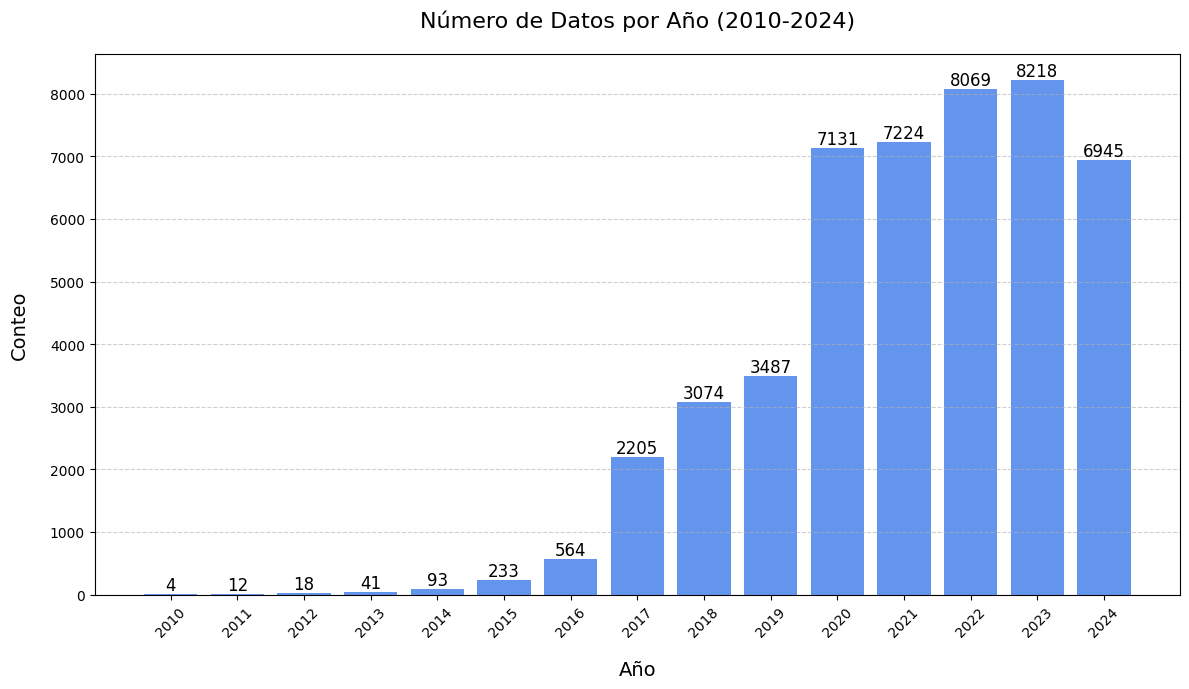

In [30]:
# Número de repositórios encontrados por año

plotar_datos_por_agno(df, "created_at")

La progresión parece ser exponencial o superlineal, con saltos significativos entre 2016-2017 y 2019-2020

In [31]:
df.topics.sample(3)

# Listas de cadenas

4439     [data-science, matplotlib, ml, numpy, pandas, ...
1043     [data-analysis, data-science, periodicity, per...
24606    [data-science, data-visualization, python, str...
Name: topics, dtype: object

Generando la primera visualización de los temas más presentes en todo el DataFrame. Nota: El tema "data-science" siempre representará la totalidad de los datos, ya que fue el filtro utilizado en la adquisición a través de la API.

In [32]:
# Generando un diccionario que contenga el tópico como clave y su contador como valor, ordenado de manera descendente

sorted_value_counts = count_topics(df, "topics")
print(sorted_value_counts)

{'data-science': 47317, 'machine-learning': 19307, 'python': 18780, 'data-analysis': 8277, 'data-visualization': 7656, 'pandas': 5185, 'jupyter-notebook': 3689, 'deep-learning': 3612, 'python3': 3267, 'data': 2986, 'r': 2880, 'numpy': 2628, 'matplotlib': 2127, 'statistics': 1937, 'machine-learning-algorithms': 1854, 'artificial-intelligence': 1779, 'scikit-learn': 1712, 'sql': 1617, 'exploratory-data-analysis': 1505, 'seaborn': 1459, 'data-mining': 1421, 'classification': 1377, 'nlp': 1292, 'visualization': 1282, 'ai': 1175, 'data-analytics': 1108, 'eda': 1072, 'sklearn': 993, 'analytics': 981, 'random-forest': 976, 'tensorflow': 976, 'linear-regression': 975, 'kaggle': 966, 'database': 938, 'streamlit': 933, 'data-engineering': 916, 'logistic-regression': 915, 'natural-language-processing': 897, 'dataset': 886, 'regression': 876, 'neural-network': 872, 'ml': 804, 'machinelearning': 797, 'data-cleaning': 762, 'datascience': 750, 'computer-vision': 741, 'analysis': 732, 'clustering': 71

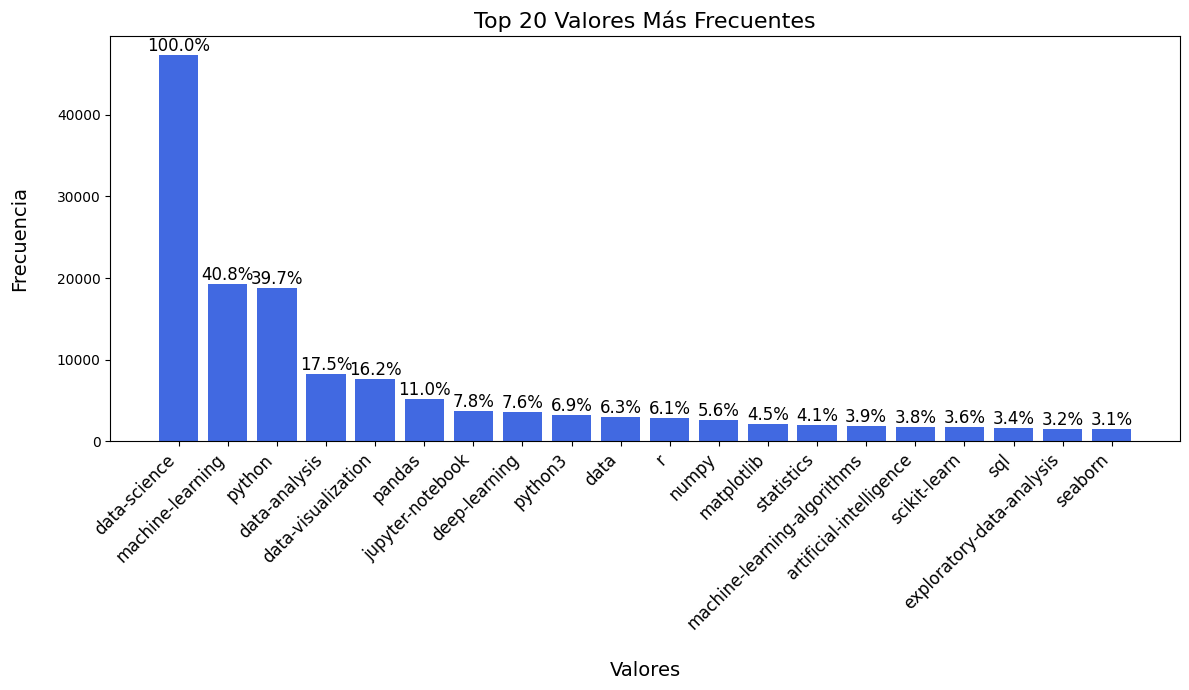

In [33]:
# Mostrando los 20 tópicos más utilizados en la historia

plot_top_20_numerical(df, sorted_value_counts)

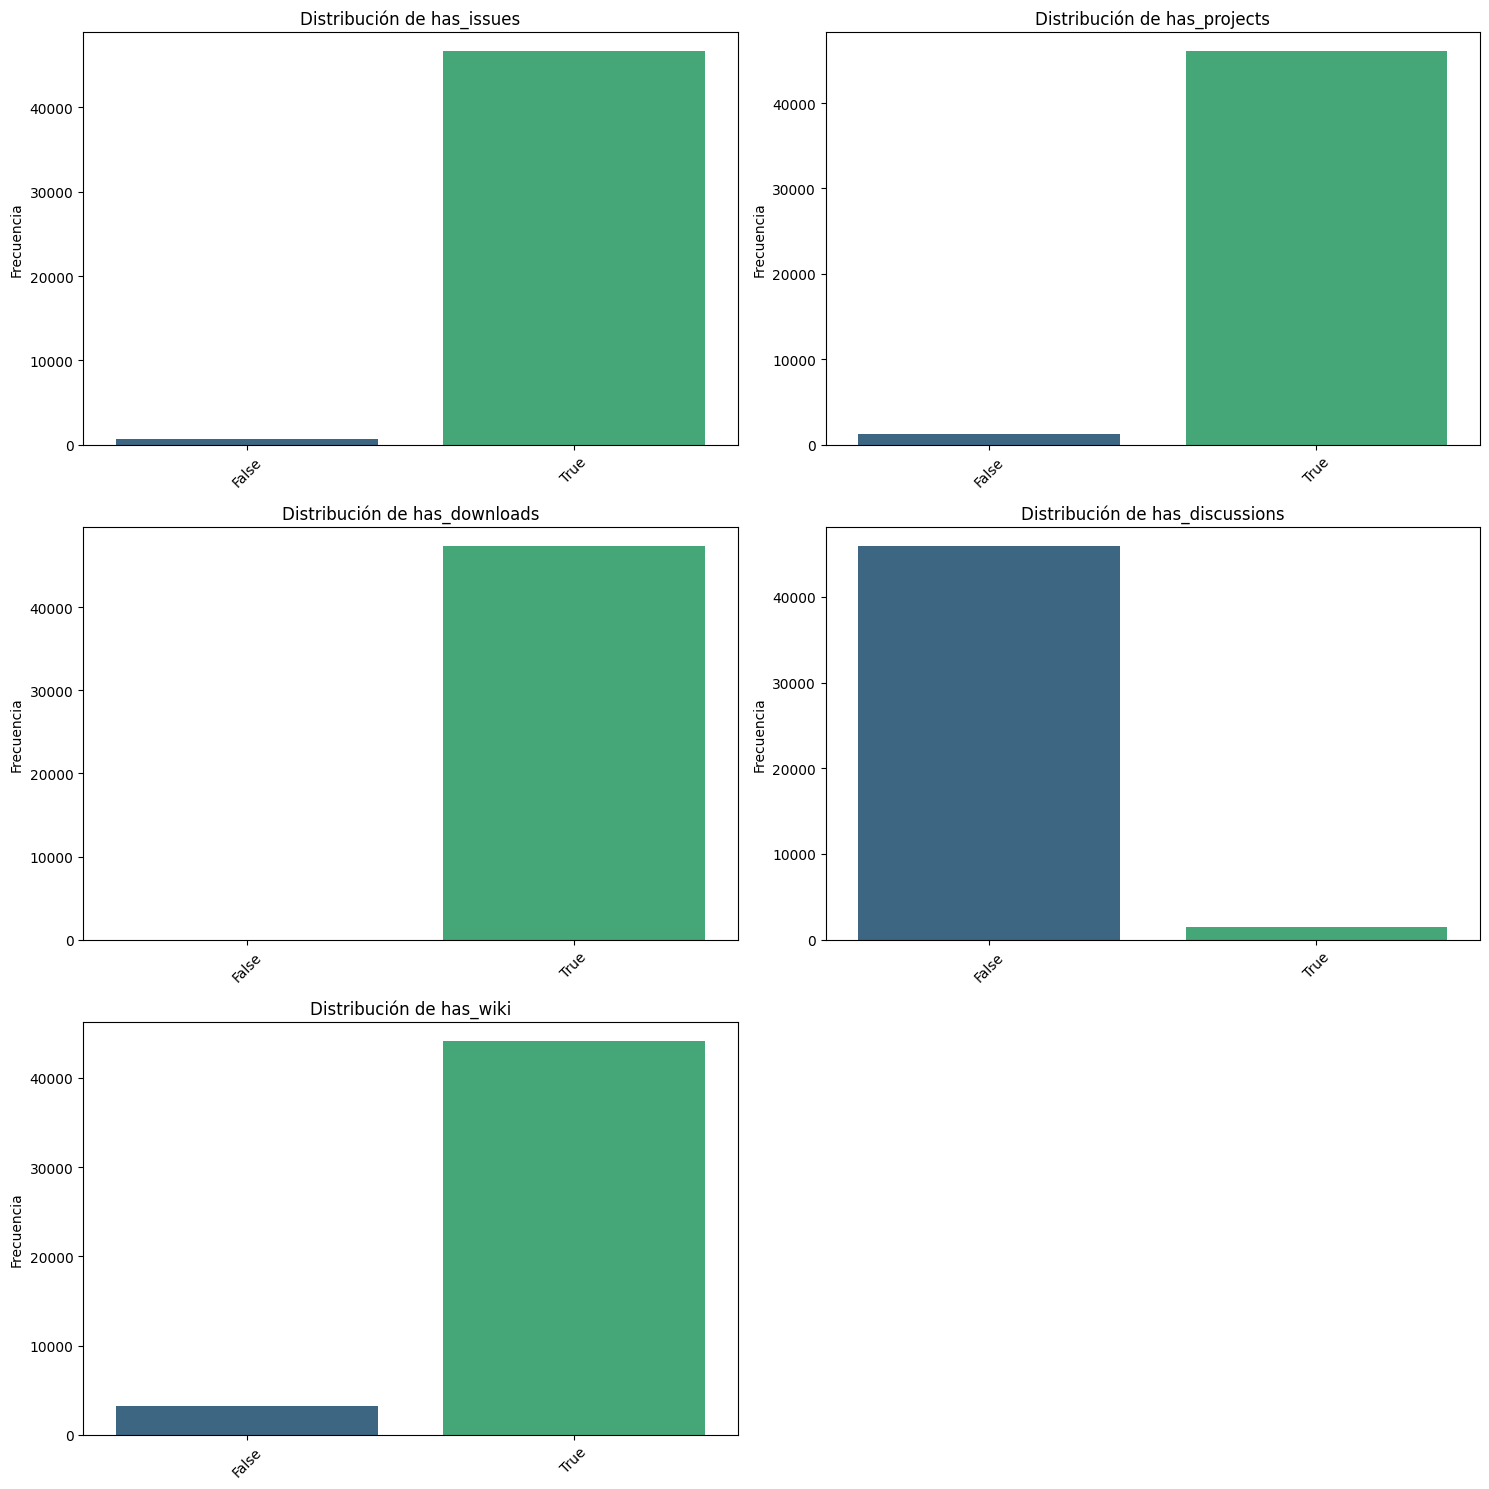

In [34]:
# Distribución de las columnas categóricas booleanas

cat_columns = ["has_issues", "has_projects", "has_downloads", "has_discussions", "has_wiki"]

pinta_distribucion_categoricas(df, cat_columns)

### 3.3. Completar Languages

In [35]:
df_language.language.value_counts().head(5)

language
Jupyter Notebook    25961
Python               8438
HTML                 2792
R                    1900
JavaScript            705
Name: count, dtype: int64

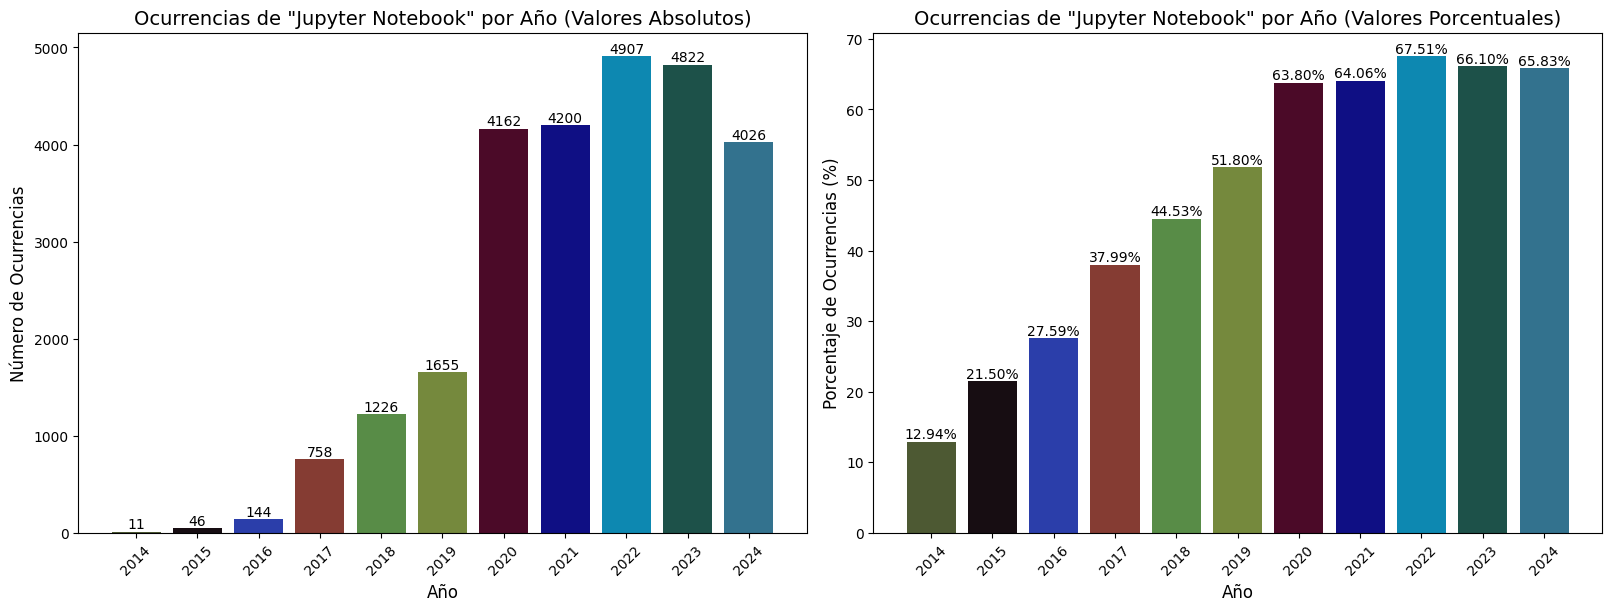

In [36]:

plot_occurrences_by_year(df_language, "language", "Jupyter Notebook", year_range=range(2014,2025))

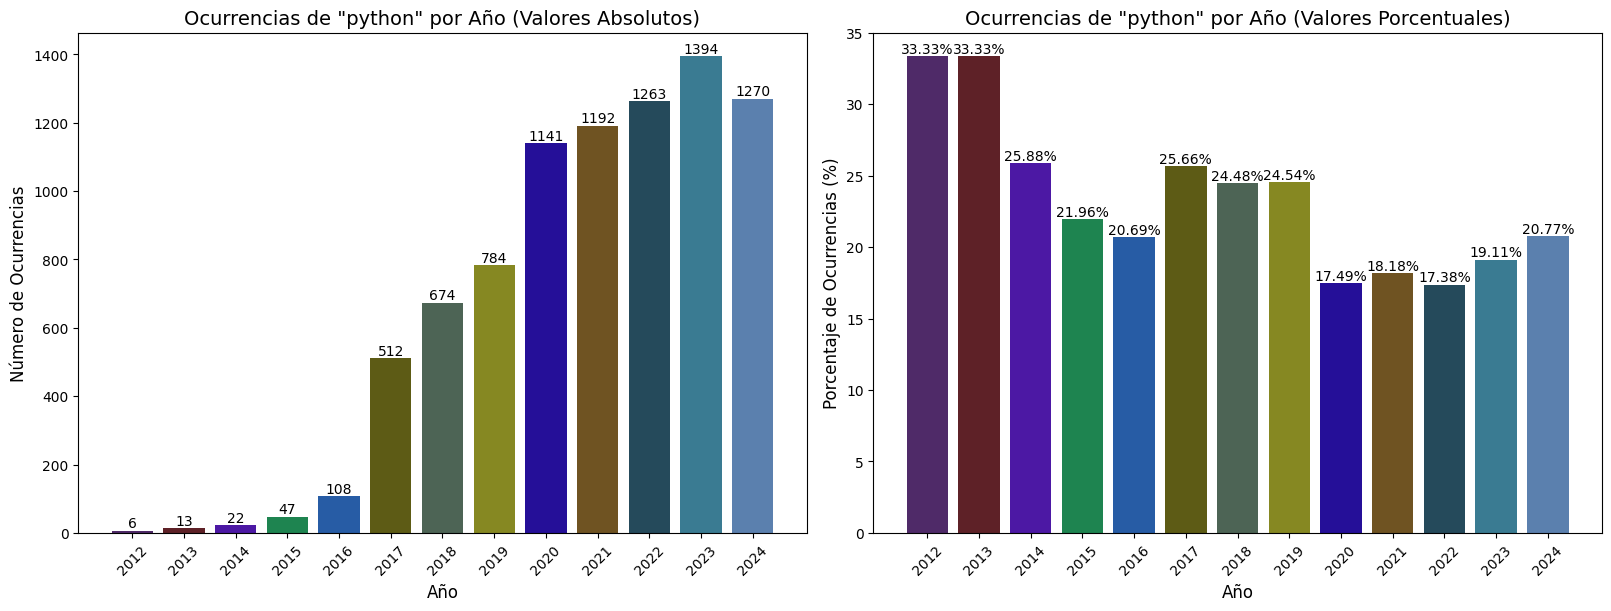

In [37]:

plot_occurrences_by_year(df_language, "language", "python", year_range=range(2012,2025))


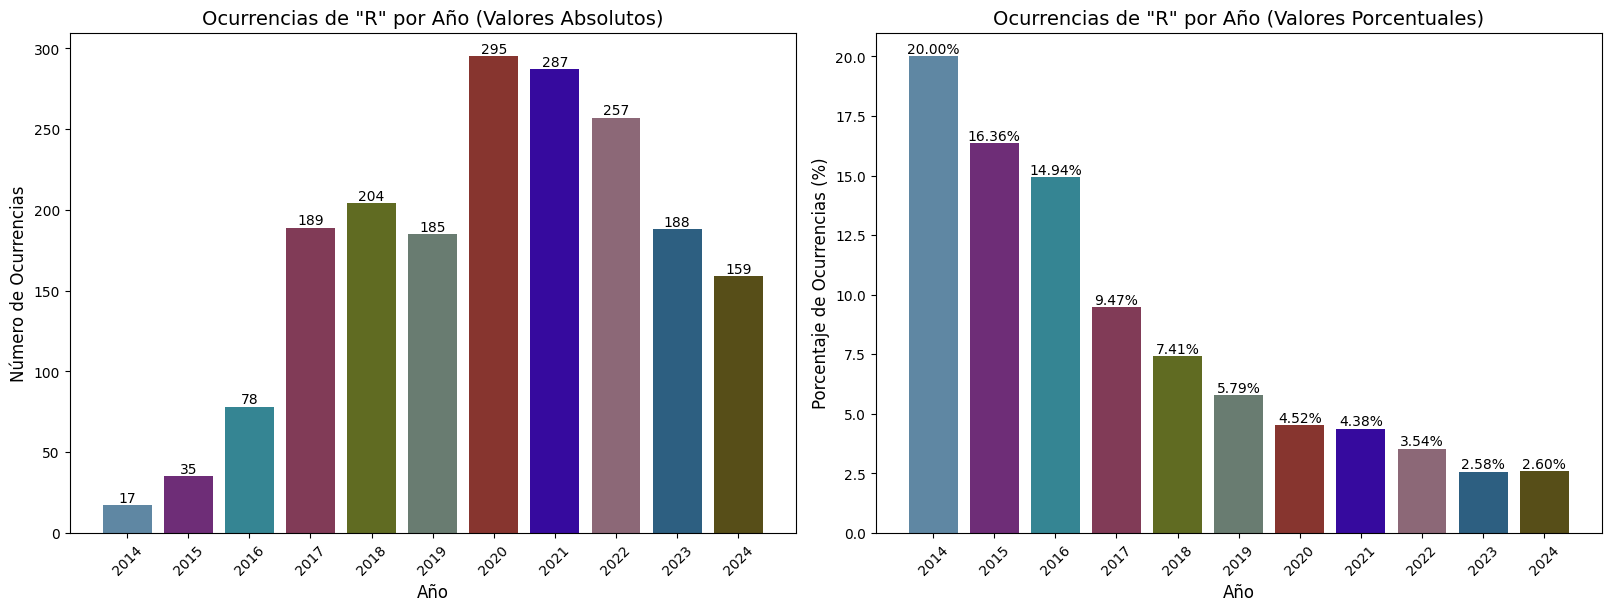

In [38]:
plot_occurrences_by_year(df_language, "language", "R", year_range=range(2014,2025))

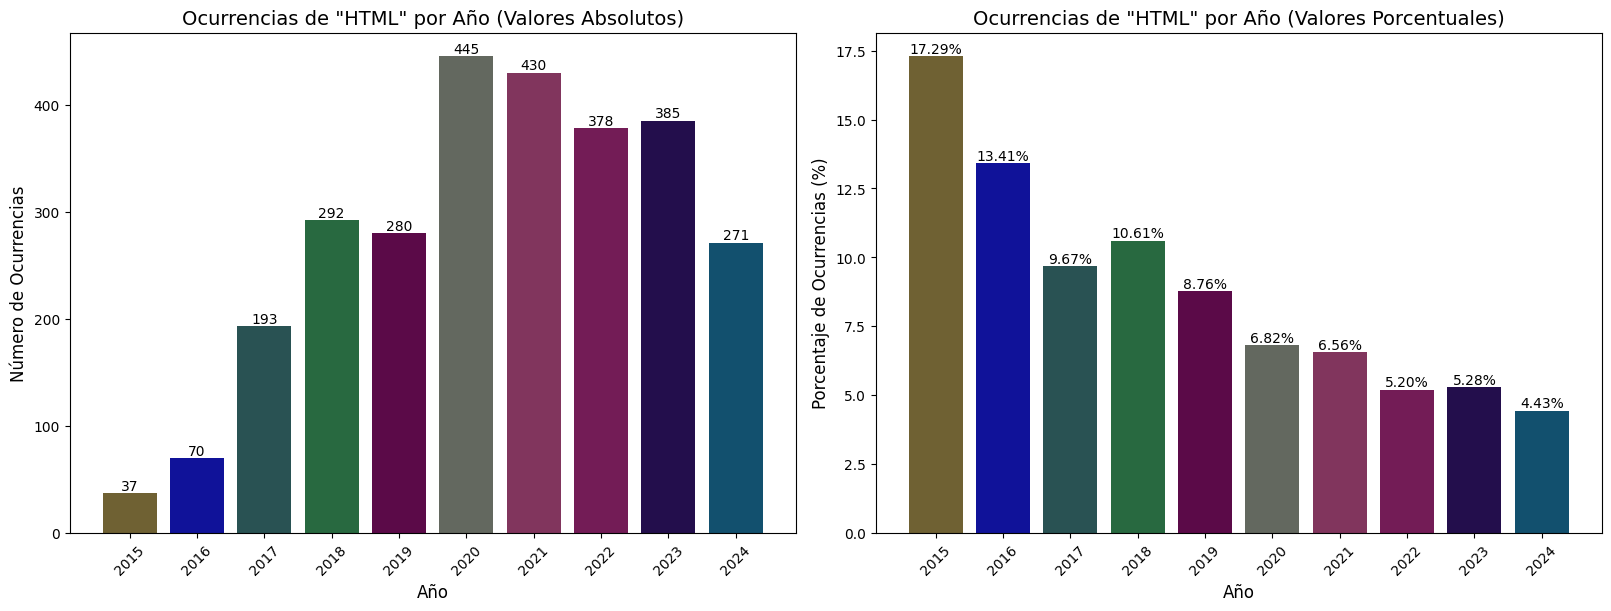

In [39]:
plot_occurrences_by_year(df_language, "language", "HTML", year_range=range(2015,2025))

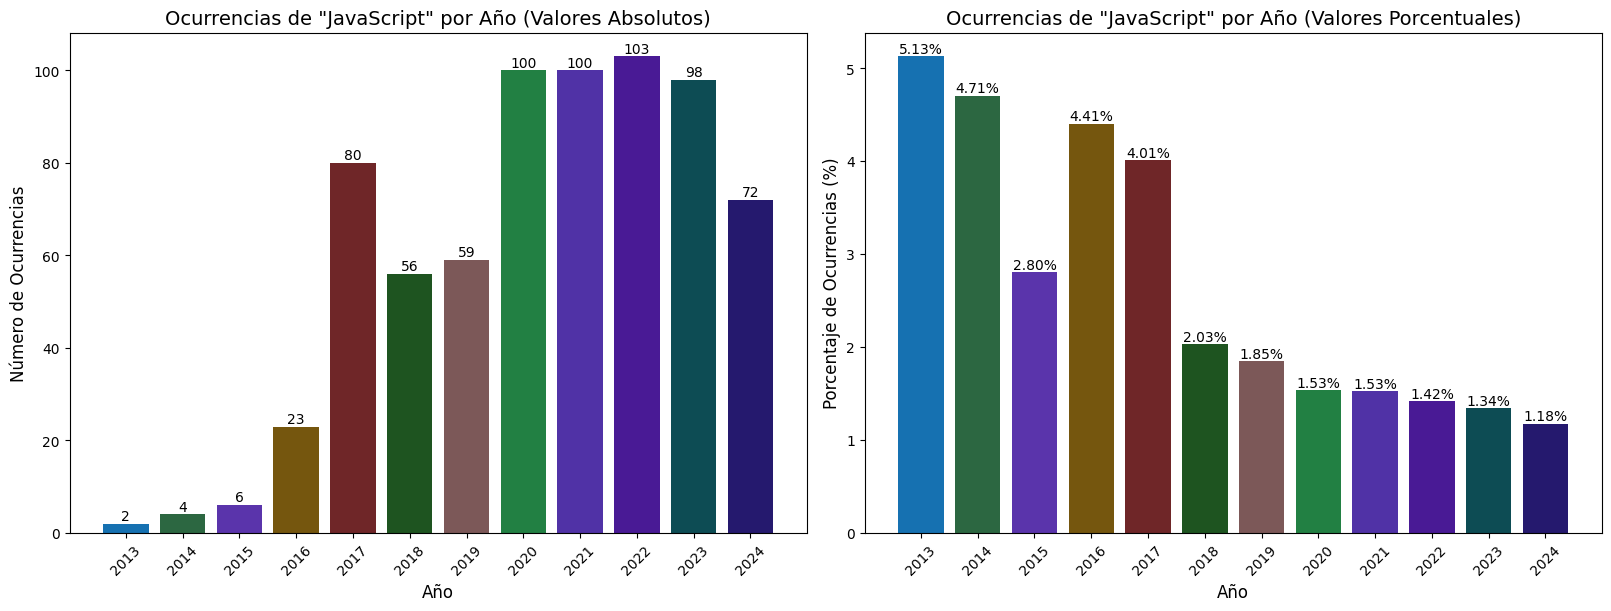

In [40]:
plot_occurrences_by_year(df_language, "language", "JavaScript", year_range=range(2013,2025))

### 3.3. "Primeras exploraciones con la variable `topics`

Valores encontrados en <topics> correspondientes a ['llm', 'llms', 'large-language']: {'llm', 'groq-llm', 'fine-tuning-llm', 'open-source-llm', 'llms', 'llms-interview-questions', 'llm-course', 'llms-questions', 'llmops-questions', 'multimodal-large-language-models', 'large-language-model', 'llms-langchain', 'llm-observability', 'llm-serving', 'llm-framework', 'llms-tech-interview', 'llmstack', 'llm-evaluation', 'llm-finetuning', 'video-llms', 'llm-for-time-series', 'large-language-models', 'llm-inference', 'llm-guardrails', 'llm-deployment', 'llm-recommendation', 'llmops-tech-interview', 'llmops', 'llm-integration', 'visual-large-language-models', 'llm-training', 'llmops-interview-questions', 'llm-agent'}
Valores encontrados en <llm_topics> correspondientes a llm: {'llm'}

Número de valores correspondientes a <['llm', 'llms', 'large-language']> en <topics>: 33
Número de valores correspondientes a <llm> en <llm_topics>: 1


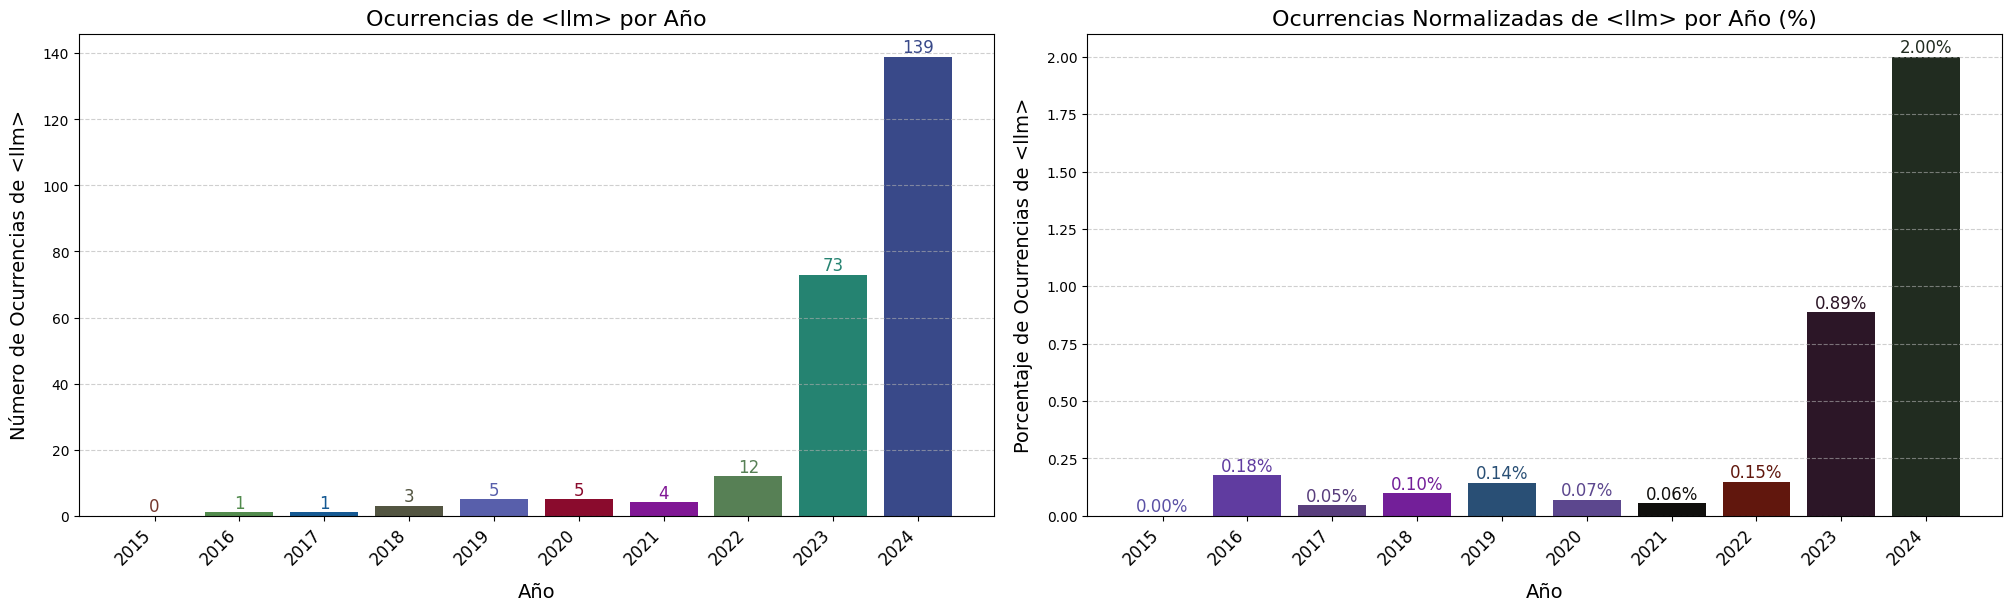

In [41]:
#plot_string_with_normalization(df, column_name, search_strings, new_name, year_range=None)

# Conta número total de tags, por isso dá um valor mais alto do que o real, pois ["llm", "big-data", "llm"] é contabilizado duas vezes no mesmo tópico

plot_string_with_normalization(df, "topics", ["llm", "llms", "large-language"], "llm", year_range=range(2015,2025))

Valores encontrados en <topics> correspondientes a ['-ai', 'ai-', 'artificial-intelligence']: {'ai-explainability', 'human-ai', 'ai-in-production', 'ai-canada', 'ai-data-collection', 'ai-recommender', 'edge-ai', 'deep-learning-ai', 'ai-powered-consumer-segmentation', 'open-ai', 'ai-model', 'javascript-ai-algorithms', 'data-science-and-ai-roadmap', 'ai-ml-python', 'ai-trends', 'ethics-in-ai', 'global-ai-hub', 'ai-strategy', 'enth-spark-ai', 'ai-driven-e-commerce-insights', 'conversational-ai', 'bangla-ai', 'ai-integration', 'ai-training', 'explainable-ai-tech-interview', 'ai-inference', 'viktor-ai', 'ai-assistant', 'ai-for-good', 'genrative-ai', 'kaggle-airline-dataset', 'generative-ai-pharmacist', 'global-ai-bootcamp', 'computer-aided-drug-design', 'midjourney-alternative-free-ai', 'ai-project', 'reliable-ai', 'data-science-and-ai-engineering', 'ai-platform', 'ai-data-analysis', 'ai-tutorial', 'ai-art', 'music-ai', 'ai-pipelines', 'operational-ai', 'explainable-artificial-intelligence'

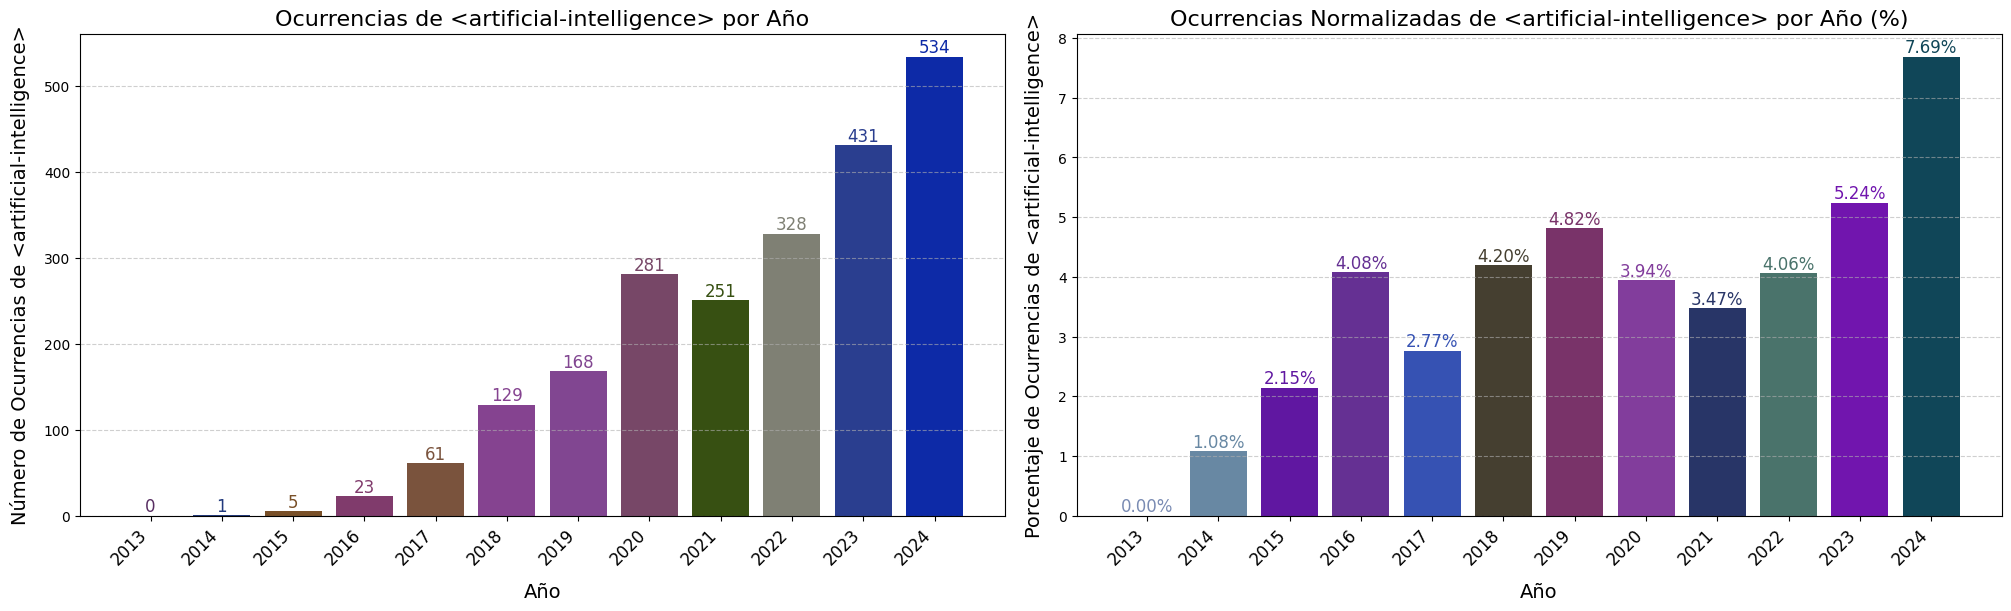

In [42]:
plot_string_with_normalization(df, "topics", ["-ai","ai-", "artificial-intelligence"], "artificial-intelligence", year_range=range(2013,2025))

Valores encontrados en <topics> correspondientes a ['generative']: {'generative-ai-model', 'generative-modelling', 'generative-ai-projects', 'generative-ai-tools', 'generative-art', 'generative-adversarial-network', 'generativeai', 'generative', 'generative-vs-discriminative-model', 'generative-music', 'generative-adversarial-networks', 'generative-ai', 'generative-ai-pharmacist', 'generative-model', 'generative-models'}
Valores encontrados en <generative-ai_topics> correspondientes a generative-ai: {'generative-ai'}

Número de valores correspondientes a <['generative']> en <topics>: 15
Número de valores correspondientes a <generative-ai> en <generative-ai_topics>: 1


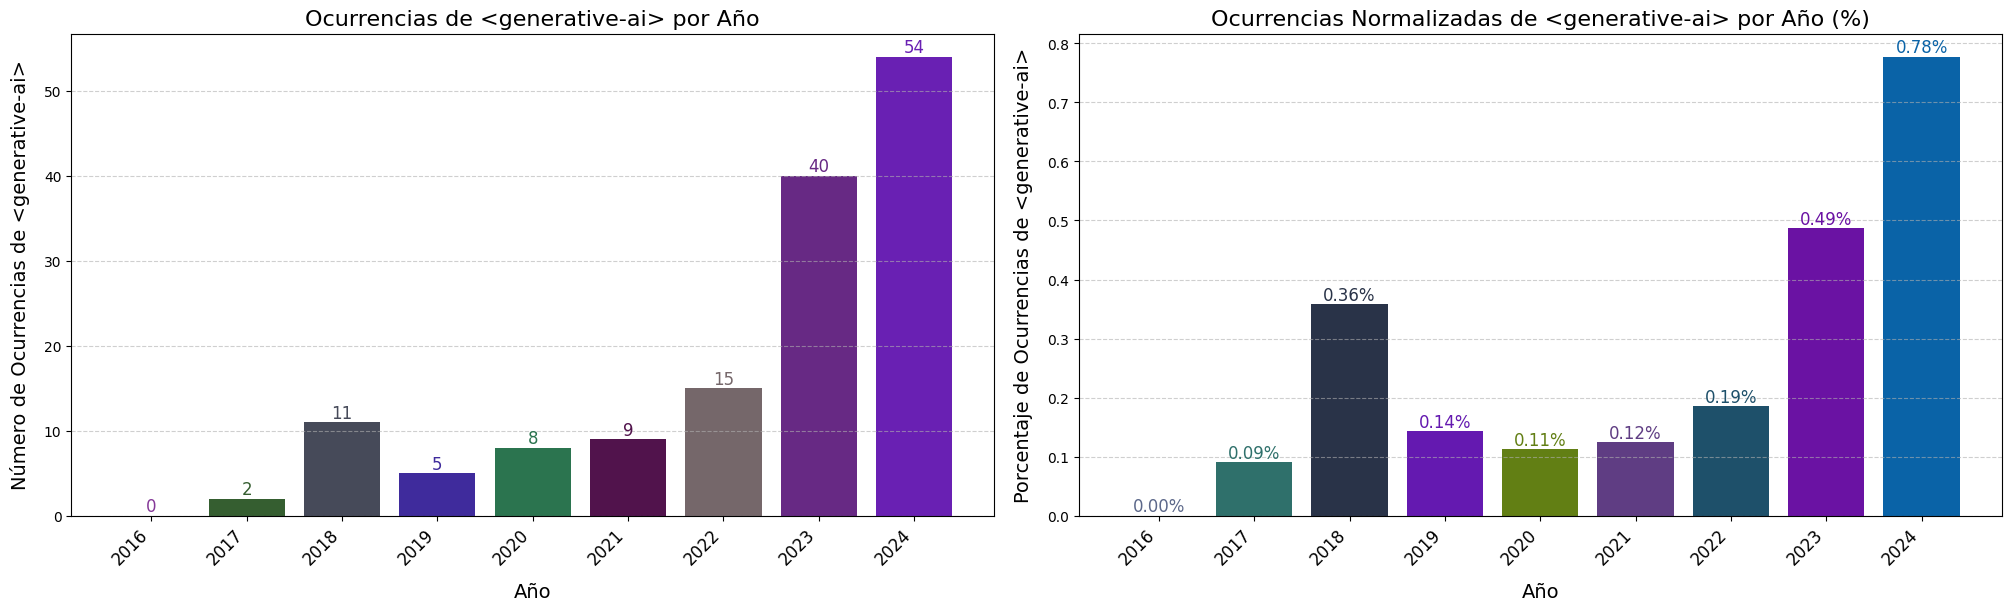

In [43]:


plot_string_with_normalization(df, "topics", "generative", "generative-ai", year_range=range(2016,2025))


Valores encontrados en <topics> correspondientes a ['big-data']: {'big-data-cleaning', 'big-data-visualization', 'big-data-hadoop', 'komputasi-big-data', 'big-data-projects', 'big-data-processing', 'api-access-to-big-dataa', 'big-data-and-ml', 'big-data-competition', 'big-data-analytics', 'big-data-essentials', 'big-data-platform', 'big-data-analysis', 'big-data-mart', 'big-data', 'big-data-storage-and-processing', 'bda-big-data-analytics'}
Valores encontrados en <big-data_topics> correspondientes a big-data: {'big-data'}

Número de valores correspondientes a <['big-data']> en <topics>: 17
Número de valores correspondientes a <big-data> en <big-data_topics>: 1


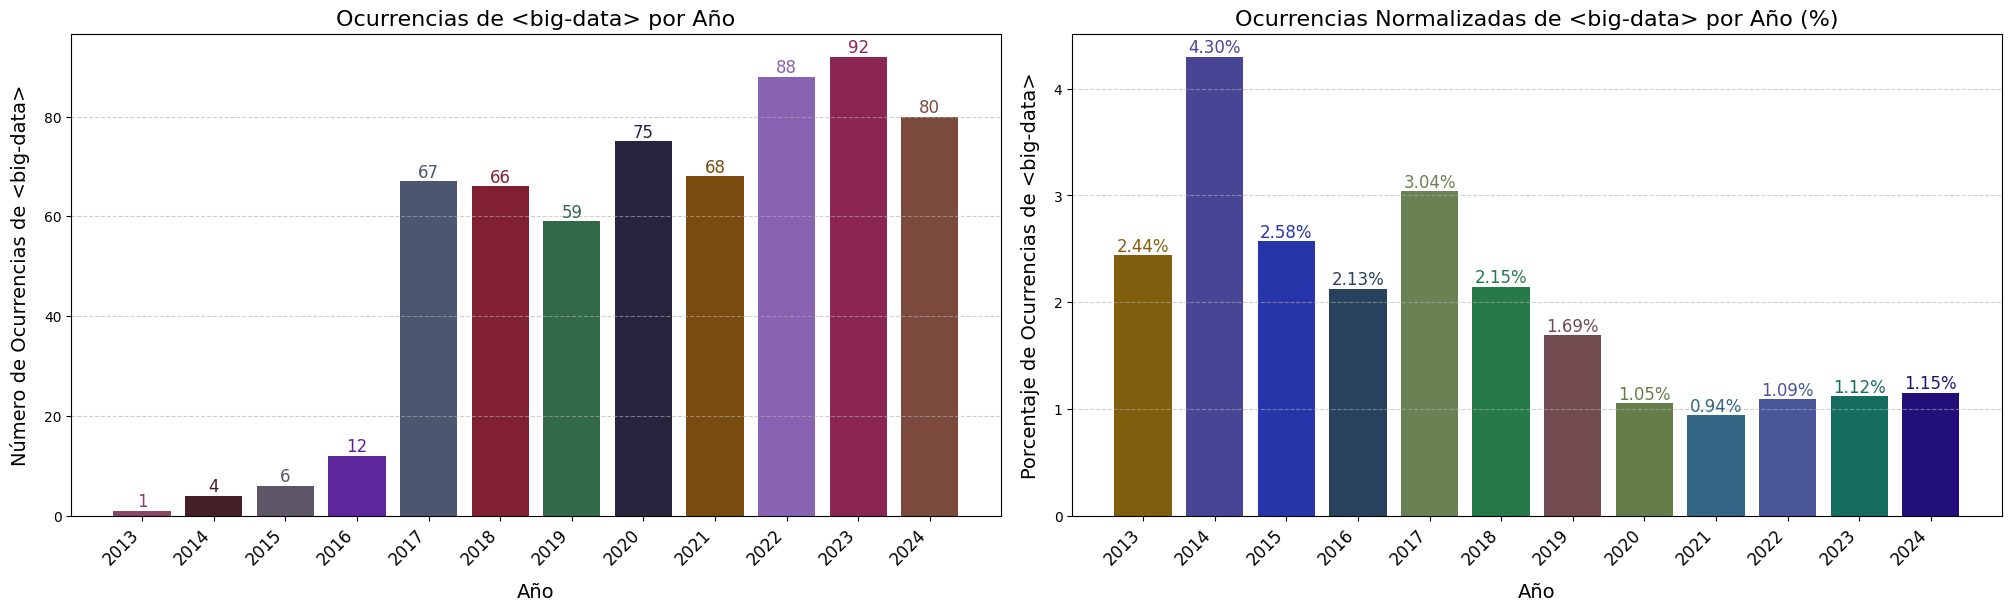

In [44]:
plot_string_with_normalization(df, "topics", "big-data", "big-data", year_range=range(2013,2025))

Valores encontrados en <topics> correspondientes a ['ml', 'machine-learning']: {'mlr3', 'machine-learning-blog', 'big-data-and-ml', 'datacamp-machine-learning', 'ml-core', 'sql-ml', 'ml0101en', 'ml-algorithms', 'machine-learning-prerequisites', 'trustworthy-machine-learning', 'car-price-prediction-with-machine-learning', 'online-machine-learning', 'distributed-ml', 'azure-ml', 'machine-learning-interview-questions', 'mlops-tech-interview', 'rubix-ml', 'scikit-learn-ml', 'machine-learning-examples', 'machine-learning-engineer', 'machine-learning-explainability', 'mlops-environment', 'fairness-ml', 'machine-learning-papers', 'ml4t-workflow', 'machine-learning-stories', 'python-machine-learning', 'quantum-machine-learning', 'machine-learning-workflow', 'machine-learning-algorithem', 'ml-design-patterns-interview-questions', 'mlsys', 'coursera-machine-learning-andrew-ng', 'ml-resources', 'mlp-regressor', 'mlops-template', 'machine-learning-cheatsheet', 'ai-ml', 'machine-learning-fundamenta

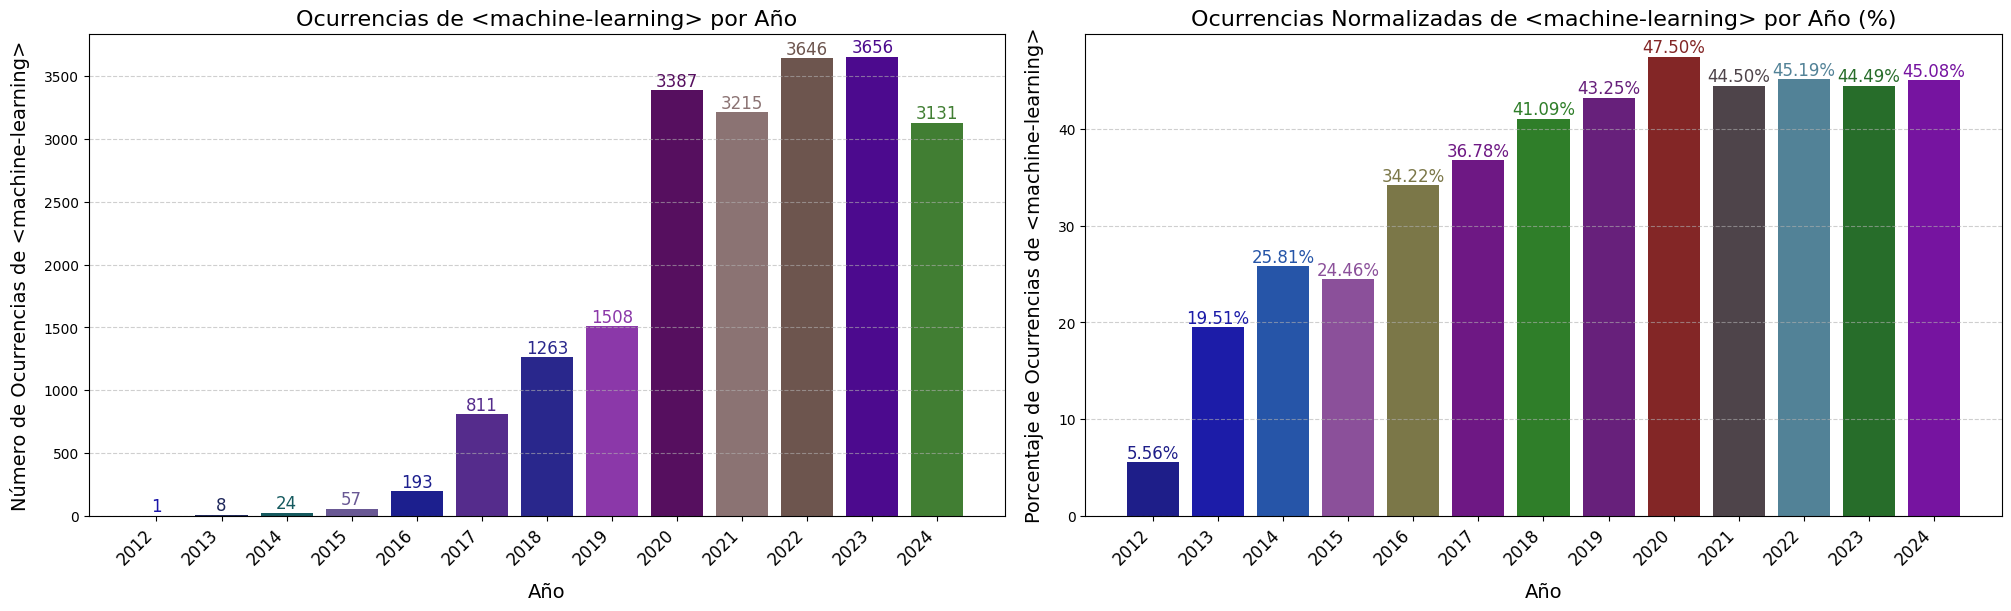

In [45]:
plot_string_with_normalization(df, "topics", ["ml", "machine-learning"], "machine-learning", year_range=range(2012,2025))

Valores encontrados en <topics> correspondientes a ['dl', 'deep-learning']: {'deep-learning-framework', 'deep-learning-engineer', 'coursera-deep-learning', 'deep-learning-pytorch', 'deep-learning-ai', 'dlib', 'deep-learning-example', 'deep-learning-networks', 'efficient-deep-learning', 'deep-learning-api', 'deep-learning-python', 'deep-learning-papers', 'geometric-deep-learning', 'deep-learning-interview', 'dlib-face-detection', 'pytorch-deep-learning', 'deep-learning-models', 'bayesian-deep-learning', 'deep-learning-project', 'dlschl-homework', 'yolov9-deep-learning', 'dlnd', 'interpretable-deep-learning', 'youtube-dl', 'dltk-model-zoo', 'deep-learning-matlab', 'dlschl', 'tensorflow-deep-learning', 'dlib-face-recognition', 'dlang', 'deep-learning-projects', 'deep-learning-interview-questions', 'nlp-deep-learning', 'deep-learning-tech-interview', 'deep-learning-practice', 'dltk', 'deep-learning', 'deep-learning-algorithms', 'dive-into-deep-learning', 'deep-learning-healthcare', 'deep-l

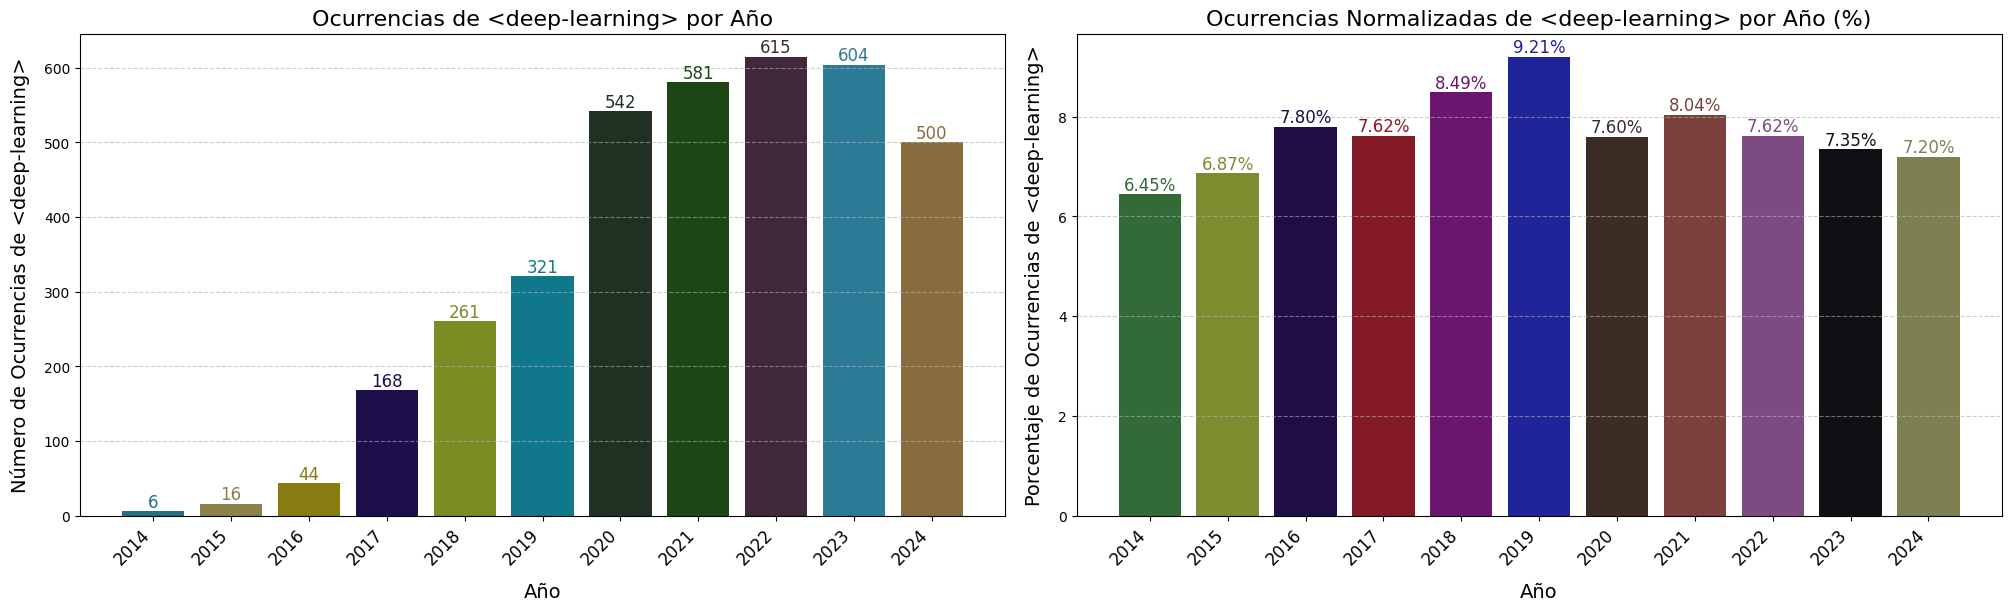

In [46]:
plot_string_with_normalization(df, "topics", ["dl", "deep-learning"], "deep-learning", year_range=range(2014,2025))

Valores encontrados en <topics> correspondientes a ['computer-vision']: {'computer-vision-project', 'computer-vision-tech-interview', 'computer-vision-projects', 'computer-vision-algorithms', 'fine-tuning-computer-vision', 'computer-vision-metrics', 'computer-vision-books', 'computer-vision-opencv', 'computer-vision-interview-questions', 'computer-vision', 'computer-vision-questions'}
Valores encontrados en <computer-vision_topics> correspondientes a computer-vision: {'computer-vision'}

Número de valores correspondientes a <['computer-vision']> en <topics>: 11
Número de valores correspondientes a <computer-vision> en <computer-vision_topics>: 1


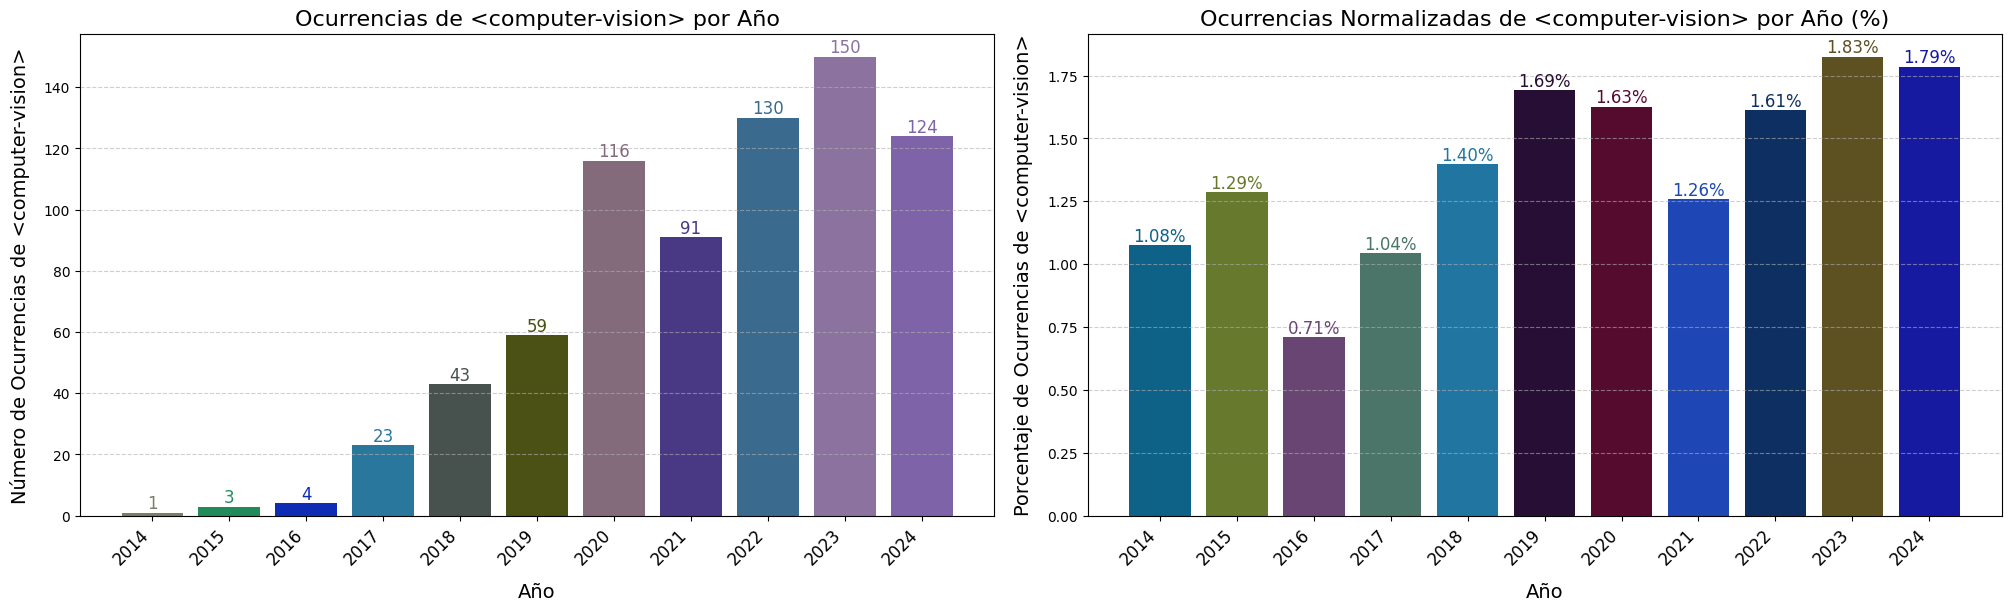

In [47]:
plot_string_with_normalization(df, "topics", ["computer-vision"], "computer-vision", year_range=range(2014,2025))

Valores encontrados en <topics> correspondientes a ['health']: {'mobile-health', 'machine-learning-healthcare', 'child-health', 'battery-health-prediction', 'personal-health-information', 'healthcheck', 'healthcare-access', 'personal-health-data-', 'structural-health-monitoring', 'healthinformatics', 'healthcare-technology', 'community-health-science', 'indonesia-healthcare', 'deep-learning-healthcare', 'fetal-health', 'health-informatics-systems', 'mental-health', 'electronic-health-record', 'health-equity', 'public-health-care', 'healthcare-analytics', 'environmental-health', 'maternal-health', 'apple-health', 'world-health-organization', 'mental-health-awareness', 'digital-health', 'healthkit', 'health-data', 'health-informatics', 'county-health-data', 'healthcare-data', 'healthtech', 'healthcare-equipment', 'project-health', 'ai-health', 'electronic-health-record-diagnosis-project', 'reproductive-health', 'womens-health', 'public-health', 'health-data-analysis', 'healthdata', 'heal

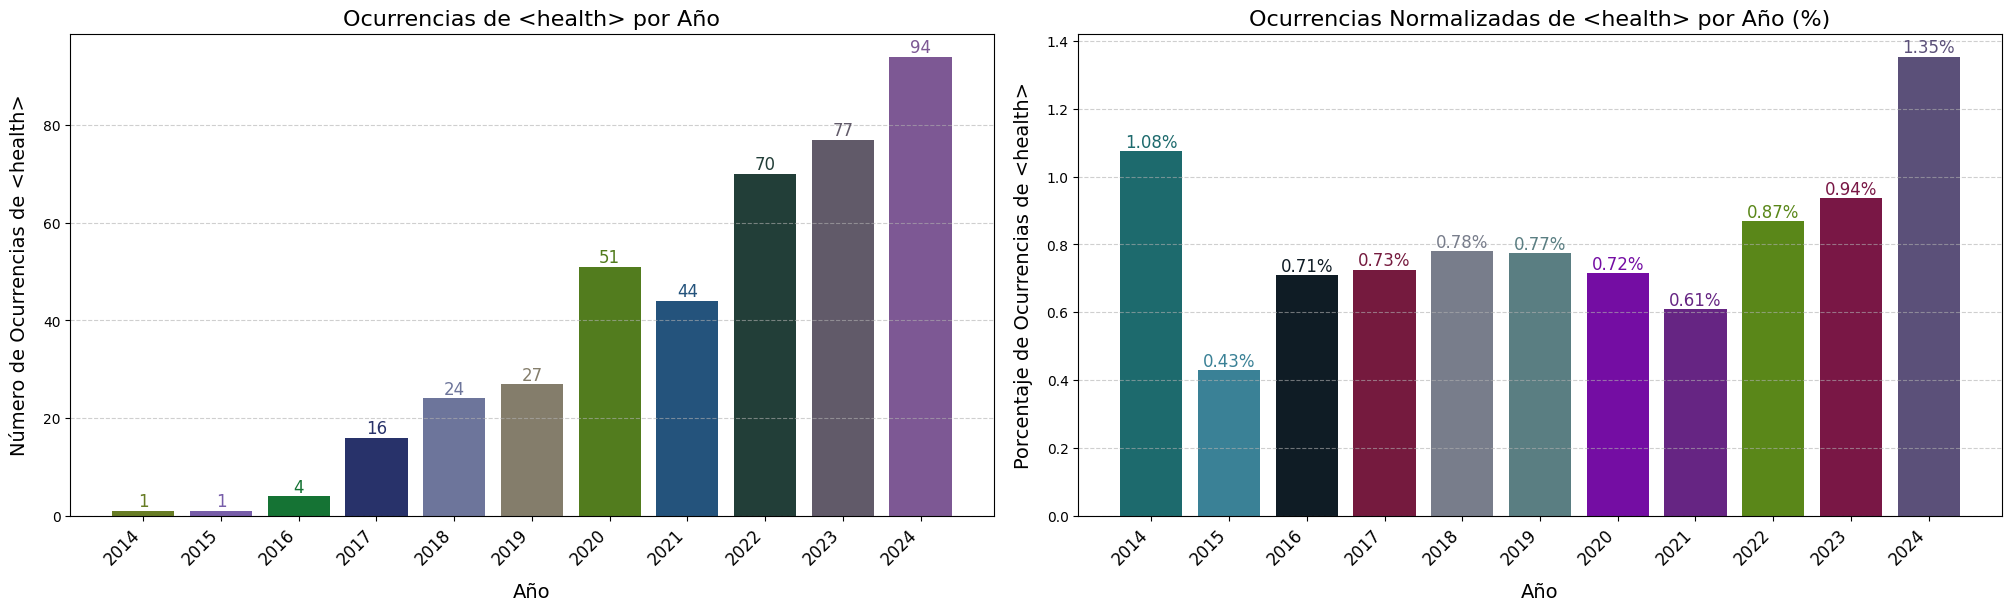

In [48]:
plot_string_with_normalization(df, "topics", "health", "health", year_range=range(2014,2025))

Valores encontrados en <topics> correspondientes a ['business-intelligence', 'power-bi', 'powerbi', 'tableau']: {'tableauskills', 'tableau', 'tableau-public', 'data-analysis-tableau', 'powerbi-reports', 'business-intelligence-team', 'power-bi-visual', 'business-intelligence', 'tableau-pubic', 'tableaulearning', 'tableau-dashboard', 'tableauvisualizations', 'power-bi-desktop', 'powerbi-report', 'tableau-extension', 'powerbi-visuals', 'data-analysis-project-powerbi', 'tableau-server', 'power-bi-dashboard', 'powerbi-service', 'tableau-dashboards', 'business-intelligence-analytics', 'tableaustory', 'powerbi', 'tableau-desktop', 'tableau-repository', 'power-bi-dax', 'powerbi-dashboards', 'tableau-project', 'microsoft-power-bi', 'powerbireports', 'dashboards-powerbi', 'powerbidashboard', 'data-analysis-powerbi', 'adaptive-business-intelligence', 'tableau-visualizations', 'tableau-visualization', 'powerbi-custom-visuals', 'power-bi', 'tableau-workbooks', 'tableauprojects', 'tableau-prep', 'bu

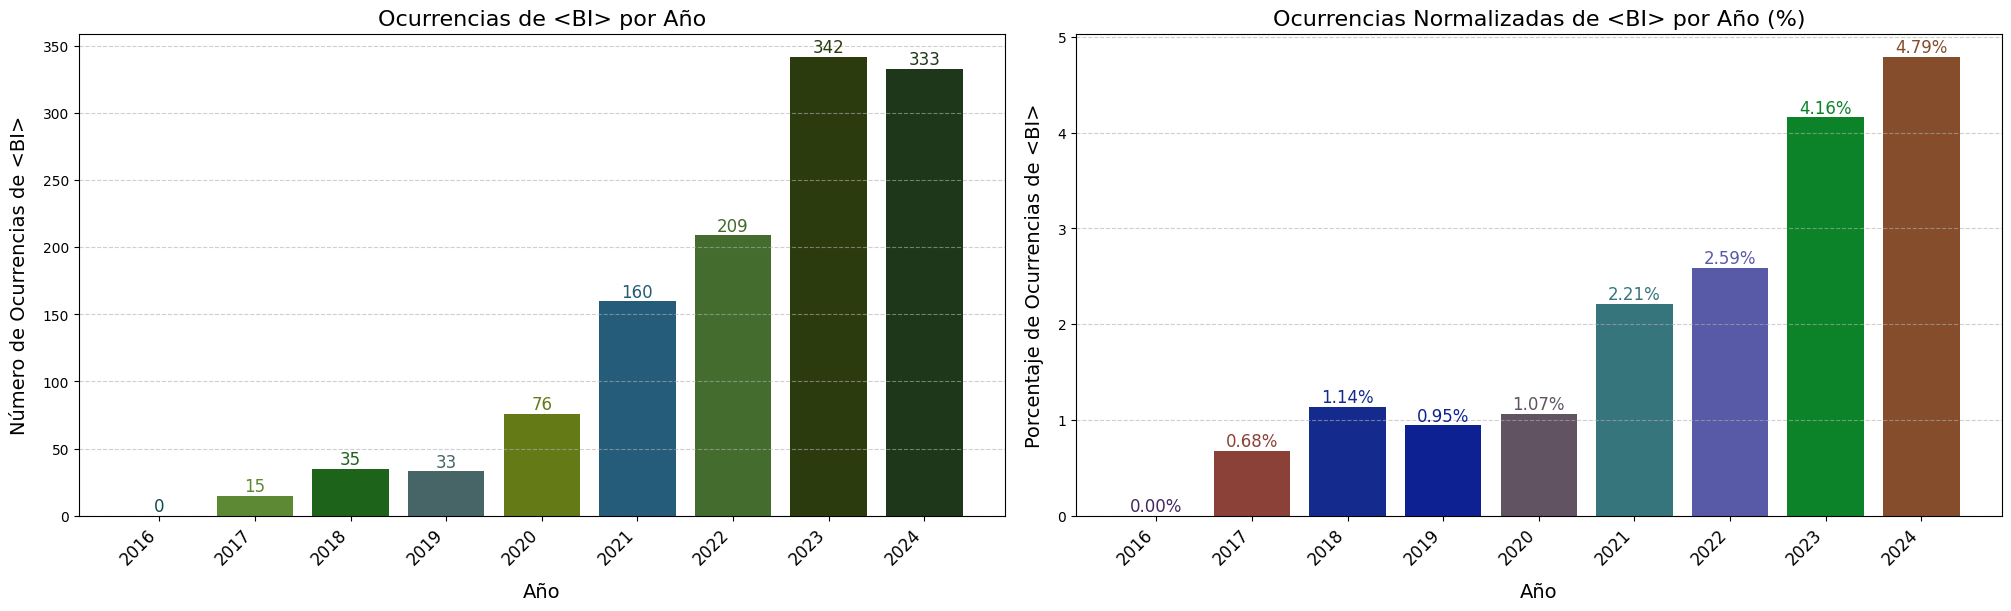

In [49]:
plot_string_with_normalization(df, "topics", ["business-intelligence", "power-bi","powerbi", "tableau"], "BI", year_range=range(2016,2025))

In [50]:
df.columns

Index(['id', 'name', 'full_name', 'owner', 'stargazers_count', 'forks_count',
       'watchers_count', 'open_issues_count', 'topics', 'created_at',
       'has_issues', 'has_projects', 'has_downloads', 'has_discussions',
       'has_wiki', 'score', 'year', 'llm_topics',
       'artificial-intelligence_topics', 'generative-ai_topics',
       'big-data_topics', 'machine-learning_topics', 'deep-learning_topics',
       'computer-vision_topics', 'health_topics', 'BI_topics'],
      dtype='object')

Correlación de Pearson entre stargazers_count y watchers_count: 1.00
Correlación de Pearson entre stargazers_count y open_issues_count: 0.49
Correlación de Pearson entre stargazers_count y forks_count: 0.89
Correlación de Pearson entre watchers_count y open_issues_count: 0.49
Correlación de Pearson entre watchers_count y forks_count: 0.89
Correlación de Pearson entre open_issues_count y forks_count: 0.48


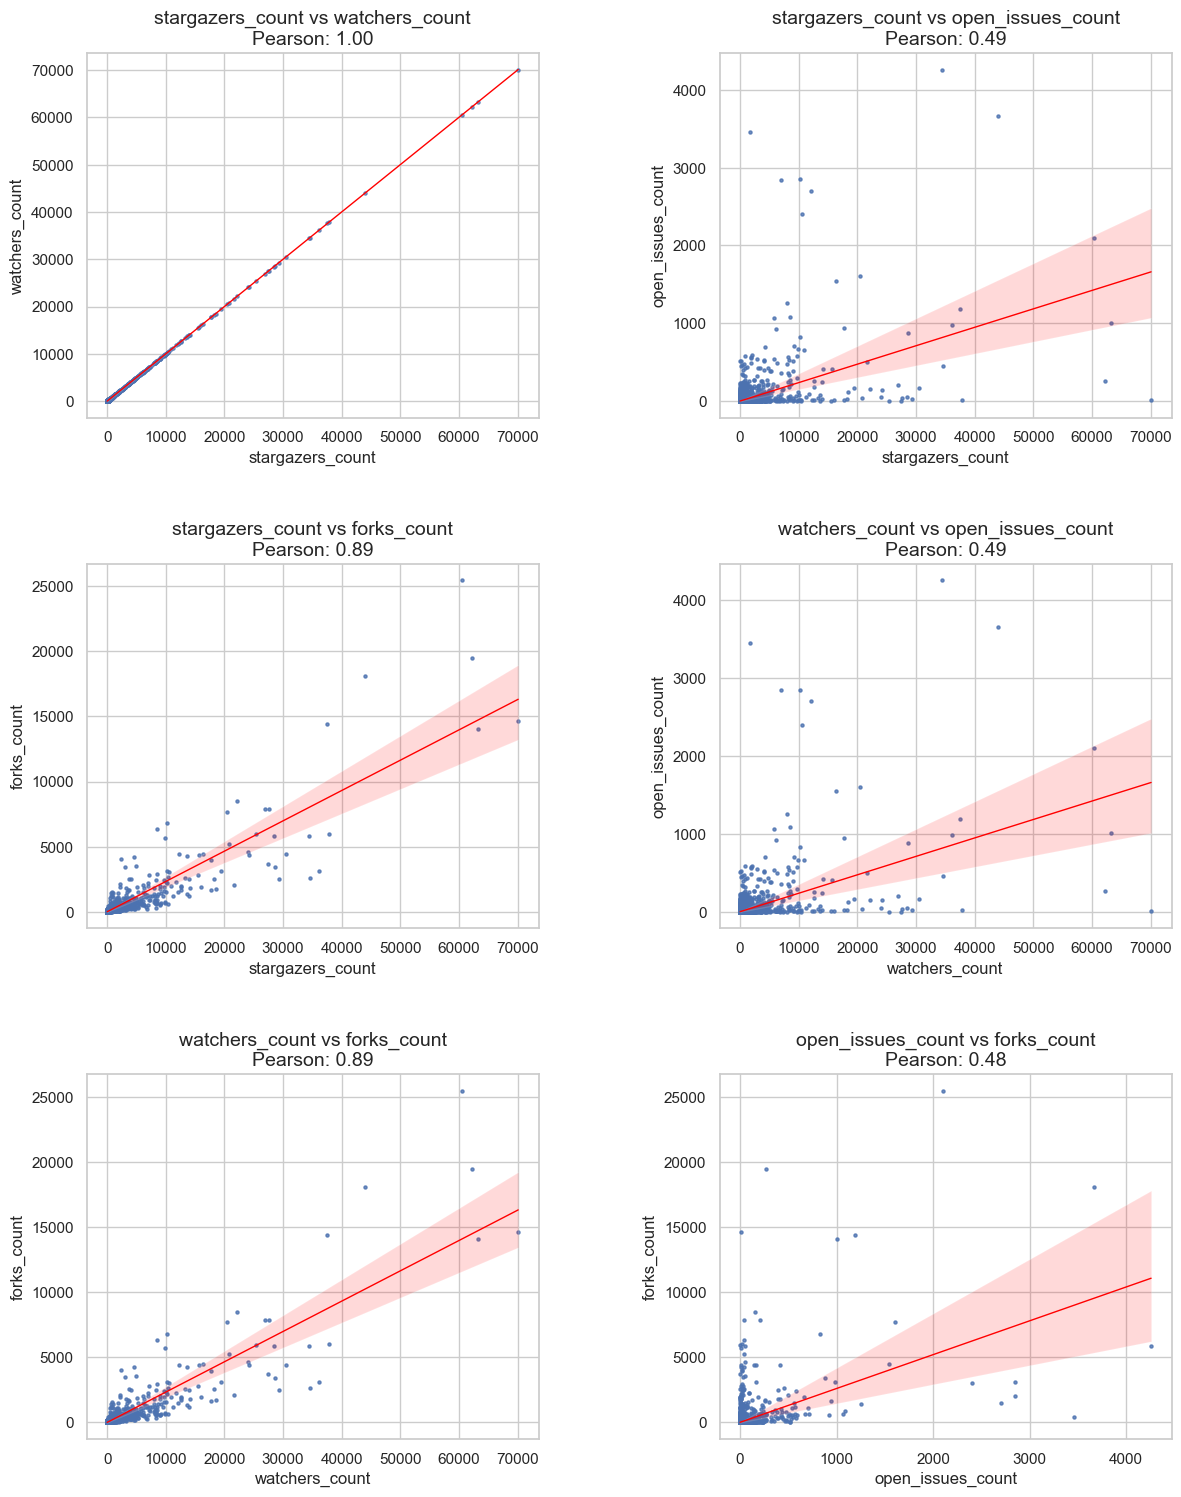

In [51]:


columns = ["stargazers_count", "watchers_count", "open_issues_count", "forks_count"]
plot_scatter_with_regression(df, columns)

In [52]:
'''Para medir a popularidade e o engajamento de um repositório do GitHub, podemos adotar as variáveis fornecidas e as correlações entre elas para construir um índice ponderado ou um valor composto. Vamos analisar cada variável para determinar sua importância relativa.

Análise das variáveis:
stargazers_count: Reflete quantas pessoas "marcaram" o repositório como interessante, ou seja, é um forte indicador de popularidade. Com correlação de 1.00 com o watchers_count, essa variável é um ótimo reflexo do interesse geral pelos repositórios, sem grandes flutuações no engajamento ativo (como forks ou issues).

watchers_count: Reflete quantas pessoas estão observando o repositório, ou seja, estão interessadas em acompanhar o progresso do projeto, o que também é uma boa métrica de engajamento. A correlação de 1.00 com stargazers_count indica que essas duas métricas estão fortemente relacionadas.

open_issues_count: Reflete o número de problemas abertos que precisam de atenção. Um valor maior pode indicar maior atividade no repositório, mas não é necessariamente um indicador direto de popularidade ou engajamento positivo, já que pode também refletir problemas ou falta de manutenção. A correlação de 0.49 com o stargazers_count e o watchers_count sugere que há uma relação moderada com o engajamento, mas não é tão forte quanto os outros.

forks_count: Reflete quantos repositórios derivados foram criados a partir deste repositório, o que é um indicador claro de engajamento ativo. Uma alta quantidade de forks geralmente sugere que outras pessoas estão contribuindo de forma ativa, seja para corrigir problemas, implementar funcionalidades ou aprender com o projeto. Com correlação de 0.89 com stargazers_count e watchers_count, essa variável tem uma forte relação com a popularidade e o engajamento, tornando-a uma boa candidata a ser uma das principais variáveis.

Construindo um Índice de Popularidade e Engajamento
Dado que há uma forte correlação entre stargazers_count e watchers_count, bem como uma boa correlação entre forks_count e essas métricas, podemos combinar essas variáveis para gerar um índice único que sintetize a popularidade e o engajamento.

Passos para calcular o Índice:
Defina um peso para cada variável: Podemos atribuir pesos com base na correlação de cada variável com a popularidade ou engajamento. Como stargazers_count e watchers_count têm a maior correlação, elas podem receber um peso maior.

Normalização: Como as unidades das variáveis podem ser diferentes, podemos normalizar os valores (por exemplo, dividir cada variável pelo valor máximo encontrado na coluna) para garantir que todas as variáveis tenham a mesma escala.

Construção do Índice: Uma abordagem simples seria calcular uma média ponderada das variáveis, onde as variáveis mais correlacionadas com a popularidade e o engajamento recebem um peso maior.

Exemplo de cálculo do índice:
Vamos calcular uma Taxa de Engajamento como a média ponderada de stargazers_count, watchers_count e forks_count, normalizando os valores e atribuindo pesos baseados nas correlações. Vamos excluir open_issues_count devido à correlação moderada com as outras variáveis.'''

'Para medir a popularidade e o engajamento de um repositório do GitHub, podemos adotar as variáveis fornecidas e as correlações entre elas para construir um índice ponderado ou um valor composto. Vamos analisar cada variável para determinar sua importância relativa.\n\nAnálise das variáveis:\nstargazers_count: Reflete quantas pessoas "marcaram" o repositório como interessante, ou seja, é um forte indicador de popularidade. Com correlação de 1.00 com o watchers_count, essa variável é um ótimo reflexo do interesse geral pelos repositórios, sem grandes flutuações no engajamento ativo (como forks ou issues).\n\nwatchers_count: Reflete quantas pessoas estão observando o repositório, ou seja, estão interessadas em acompanhar o progresso do projeto, o que também é uma boa métrica de engajamento. A correlação de 1.00 com stargazers_count indica que essas duas métricas estão fortemente relacionadas.\n\nopen_issues_count: Reflete o número de problemas abertos que precisam de atenção. Um valor ma

In [53]:
# Preparações e normalizações para testes de hipóteses

In [54]:

# Exemplo de uso:
outlier_cutoff = detect_outliers(df, 'stargazers_count', factor=1.5)  # Ajusta el factor si es necesario
print(f"Los outliers son valores superiores a: {outlier_cutoff}")
outlier_cutoff = detect_outliers(df, 'forks_count', factor=1.5)  # Ajusta el factor si es necesario
print(f"Los outliers son valores superiores a: {outlier_cutoff}")


Los outliers son valores superiores a: 5.0
Los outliers son valores superiores a: 2.5


In [55]:
#  Gerar df que não tenham valores nulos nem de star nem forks

# Normalizar pela data os valores 

# Repetir teste de hipóteses

In [56]:
df_outliers = df[(df['stargazers_count'] >5) & (df['forks_count'] > 2.5) & (df["year"] > 2010)]
print(len(df), len(df_outliers))

47318 4808


In [60]:
df_filtered = normalize_by_months(df_outliers)

df = normalize_by_months(df)

df_filtered.head()

,id,name,full_name,owner,stargazers_count,forks_count,watchers_count,open_issues_count,topics,created_at,...,generative-ai_topics,big-data_topics,machine-learning_topics,deep-learning_topics,computer-vision_topics,health_topics,BI_topics,months_since_creation,stargazers_rate,forks_rate
4,1385122,matplotlib,matplotlib/matplotlib,"{'login': 'matplotlib', 'id': 215947, 'node_id...",20440,7684,20440,1605,"[data-science, data-visualization, gtk, matplo...",2011-02-19 03:17:12,...,"[data-science, data-visualization, gtk, matplo...","[data-science, data-visualization, gtk, matplo...","[data-science, data-visualization, gtk, matplo...","[data-science, data-visualization, gtk, matplo...","[data-science, data-visualization, gtk, matplo...","[data-science, data-visualization, gtk, matplo...","[data-science, data-visualization, gtk, matplo...",166,1581.694687,594.605772
5,1349775,gensim,piskvorky/gensim,"{'login': 'piskvorky', 'id': 610412, 'node_id'...",15729,4383,15729,413,"[data-mining, data-science, document-similarit...",2011-02-10 07:43:04,...,"[data-mining, data-science, document-similarit...","[data-mining, data-science, document-similarit...","[data-mining, data-science, document-similarit...","[data-mining, data-science, document-similarit...","[data-mining, data-science, document-similarit...","[data-mining, data-science, document-similarit...","[data-mining, data-science, document-similarit...",166,1217.146562,339.166723
6,1555094,shogun,shogun-toolbox/shogun,"{'login': 'shogun-toolbox', 'id': 690673, 'nod...",3032,1037,3032,427,"[artificial-intelligence, c-plus-plus, cmake, ...",2011-04-01 10:44:32,...,"[artificial-intelligence, c-plus-plus, cmake, ...","[artificial-intelligence, c-plus-plus, cmake, ...","[artificial-intelligence, c-plus-plus, cmake, ...","[artificial-intelligence, c-plus-plus, cmake, ...","[artificial-intelligence, c-plus-plus, cmake, ...","[artificial-intelligence, c-plus-plus, cmake, ...","[artificial-intelligence, c-plus-plus, cmake, ...",164,236.040880,80.730341
8,1678015,pycwt,regeirk/pycwt,"{'login': 'regeirk', 'id': 742200, 'node_id': ...",302,108,302,8,"[data-science, python, python3, signal-process...",2011-04-28 21:11:59,...,"[data-science, python, python3, signal-process...","[data-science, python, python3, signal-process...","[data-science, python, python3, signal-process...","[data-science, python, python3, signal-process...","[data-science, python, python3, signal-process...","[data-science, python, python3, signal-process...","[data-science, python, python3, signal-process...",164,23.510668,8.407789
9,1768238,glue,glue-viz/glue,"{'login': 'glue-viz', 'id': 1926209, 'node_id'...",744,153,744,477,"[data-science, linked-data, python, visualizat...",2011-05-18 20:58:54,...,"[data-science, linked-data, python, visualizat...","[data-science, linked-data, python, visualizat...","[data-science, linked-data, python, visualizat...","[data-science, linked-data, python, visualizat...","[data-science, linked-data, python, visualizat...","[data-science, linked-data, python, visualizat...","[data-science, linked-data, python, visualizat...",163,58.096639,11.947293


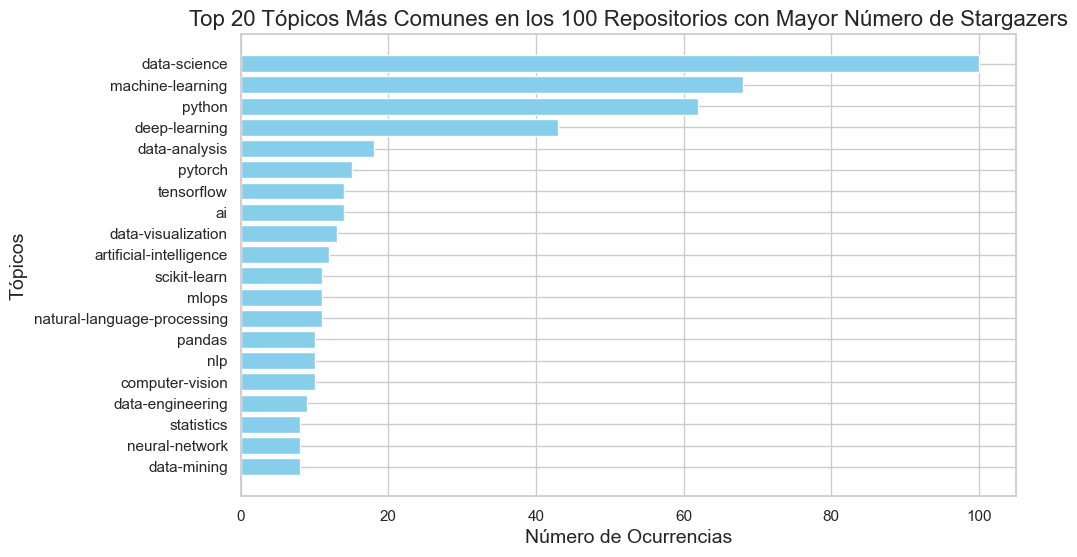

In [57]:


top_20_strings_by_success(df)

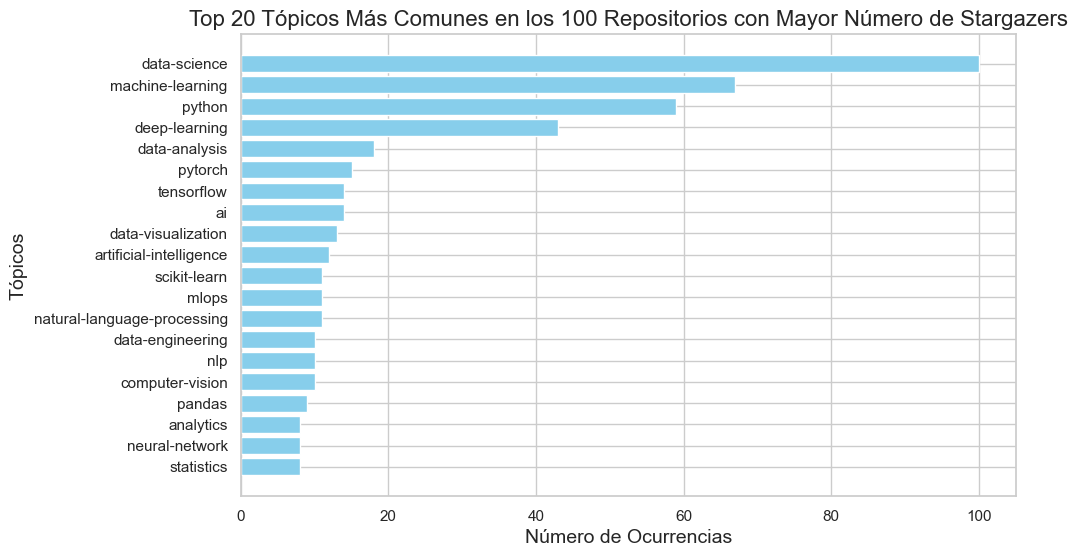

In [63]:
top_20_strings_by_success(df_filtered)

In [64]:
df_filtered.columns

Index(['id', 'name', 'full_name', 'owner', 'stargazers_count', 'forks_count',
       'watchers_count', 'open_issues_count', 'topics', 'created_at',
       'has_issues', 'has_projects', 'has_downloads', 'has_discussions',
       'has_wiki', 'score', 'year', 'llm_topics',
       'artificial-intelligence_topics', 'generative-ai_topics',
       'big-data_topics', 'machine-learning_topics', 'deep-learning_topics',
       'computer-vision_topics', 'health_topics', 'BI_topics',
       'months_since_creation', 'stargazers_rate', 'forks_rate'],
      dtype='object')

Número de repositorios con la etiqueta 'llm': 73
Número de repositorios sin la etiqueta 'llm': 4735
Número de repositorios con la etiqueta 'llm' (después de sobreamostrado): 4735

Para stargazers_rate:
Total 'con llm': 20148.979702060926
Total 'sin llm': 10716.2209243309
Valor normalizado 'con llm': 4.255328342568306
Valor normalizado 'sin llm': 2.2631934370287015

Para forks_rate:
Total 'con llm': 11514.909393284124
Total 'sin llm': 6643.489169884287
Valor normalizado 'con llm': 2.4318710439881994
Valor normalizado 'sin llm': 1.403060014759089


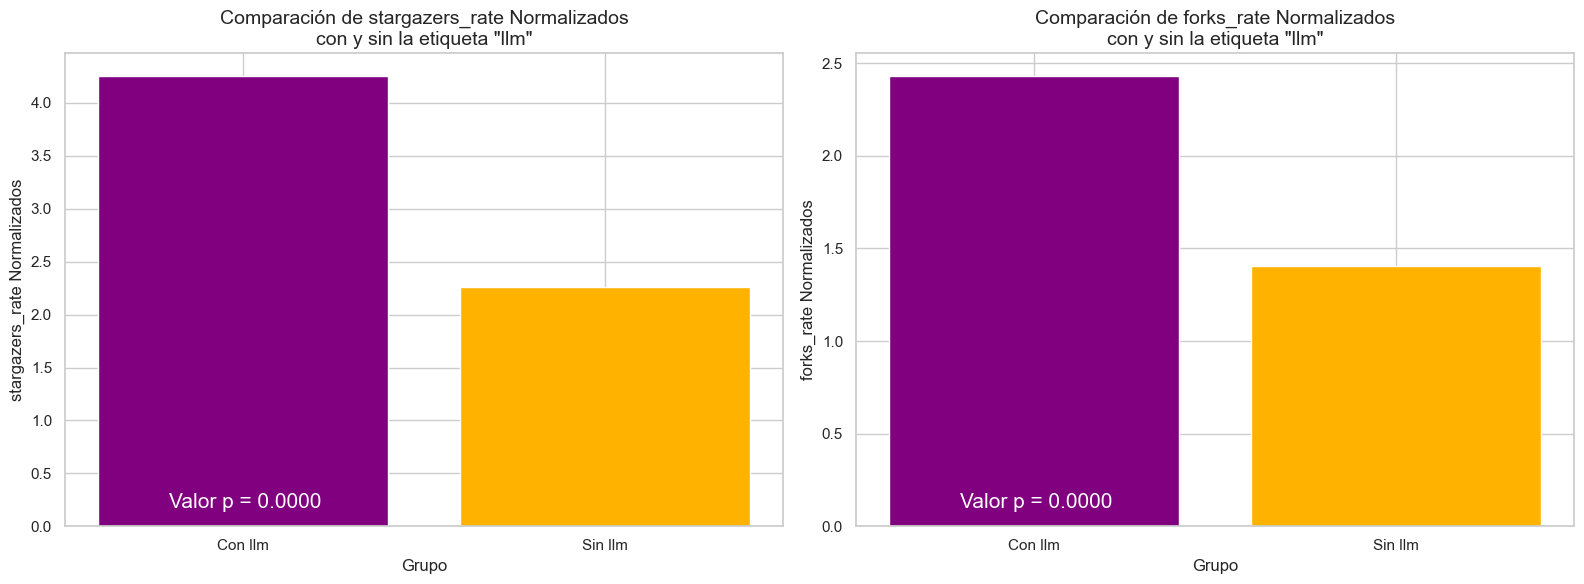

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0000
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [65]:
analyze_topic_success(df_filtered, "llm_topics", "llm", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'artificial-intelligence': 448
Número de repositorios sin la etiqueta 'artificial-intelligence': 4360
Número de repositorios con la etiqueta 'artificial-intelligence' (después de sobreamostrado): 4360

Para stargazers_rate:
Total 'con artificial-intelligence': 12054.945236331941
Total 'sin artificial-intelligence': 9788.31202867065
Valor normalizado 'con artificial-intelligence': 2.7648956964064086
Valor normalizado 'sin artificial-intelligence': 2.245025694649232

Para forks_rate:
Total 'con artificial-intelligence': 7323.528086973435
Total 'sin artificial-intelligence': 6076.436999834356
Valor normalizado 'con artificial-intelligence': 1.6797082768287694
Valor normalizado 'sin artificial-intelligence': 1.3936782109711827


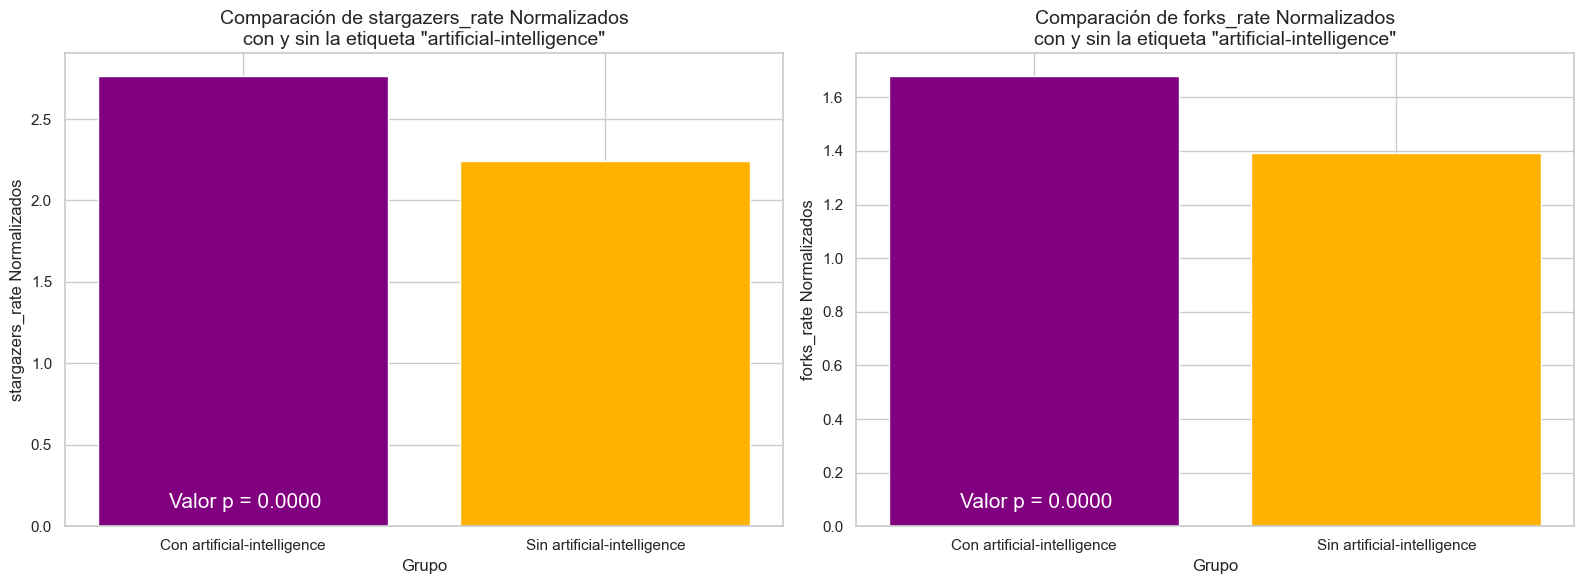

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0000
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [66]:
analyze_topic_success(df_filtered, "artificial-intelligence_topics", "artificial-intelligence", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'generative-ai': 30
Número de repositorios sin la etiqueta 'generative-ai': 4778
Número de repositorios con la etiqueta 'generative-ai' (después de sobreamostrado): 4778

Para stargazers_rate:
Total 'con generative-ai': 12382.326308446354
Total 'sin generative-ai': 10950.227459218971
Valor normalizado 'con generative-ai': 2.5915291562256915
Valor normalizado 'sin generative-ai': 2.2918014774422293

Para forks_rate:
Total 'con generative-ai': 7359.447668218019
Total 'sin generative-ai': 6776.032850112344
Valor normalizado 'con generative-ai': 1.5402778711213938
Valor normalizado 'sin generative-ai': 1.4181734721875983


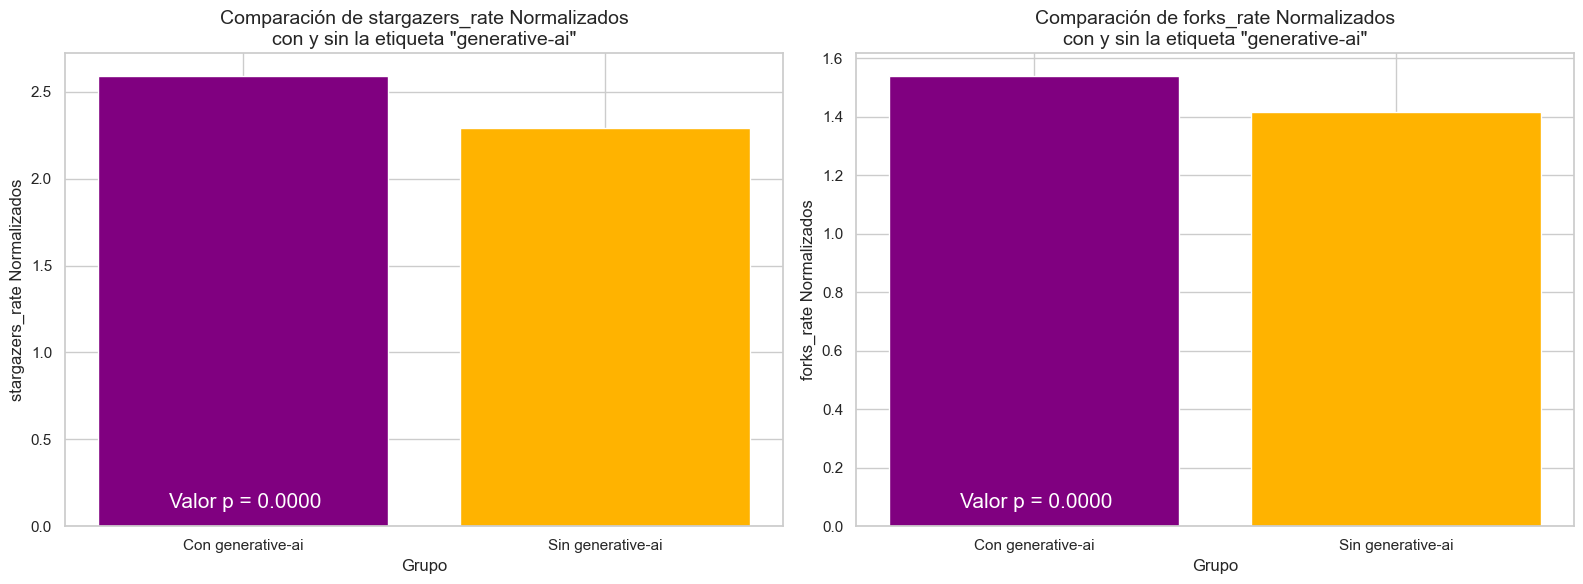

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0000
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [67]:
analyze_topic_success(df_filtered, "generative-ai_topics", "generative-ai", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'health': 45
Número de repositorios sin la etiqueta 'health': 4763
Número de repositorios con la etiqueta 'health' (después de sobreamostrado): 4763

Para stargazers_rate:
Total 'con health': 8778.821202254509
Total 'sin health': 10945.370212502294
Valor normalizado 'con health': 1.8431285329108773
Valor normalizado 'sin health': 2.297999204808376

Para forks_rate:
Total 'con health': 5308.589538070223
Total 'sin health': 6772.359927127064
Valor normalizado 'con health': 1.1145474570796186
Valor normalizado 'sin health': 1.4218685549290497


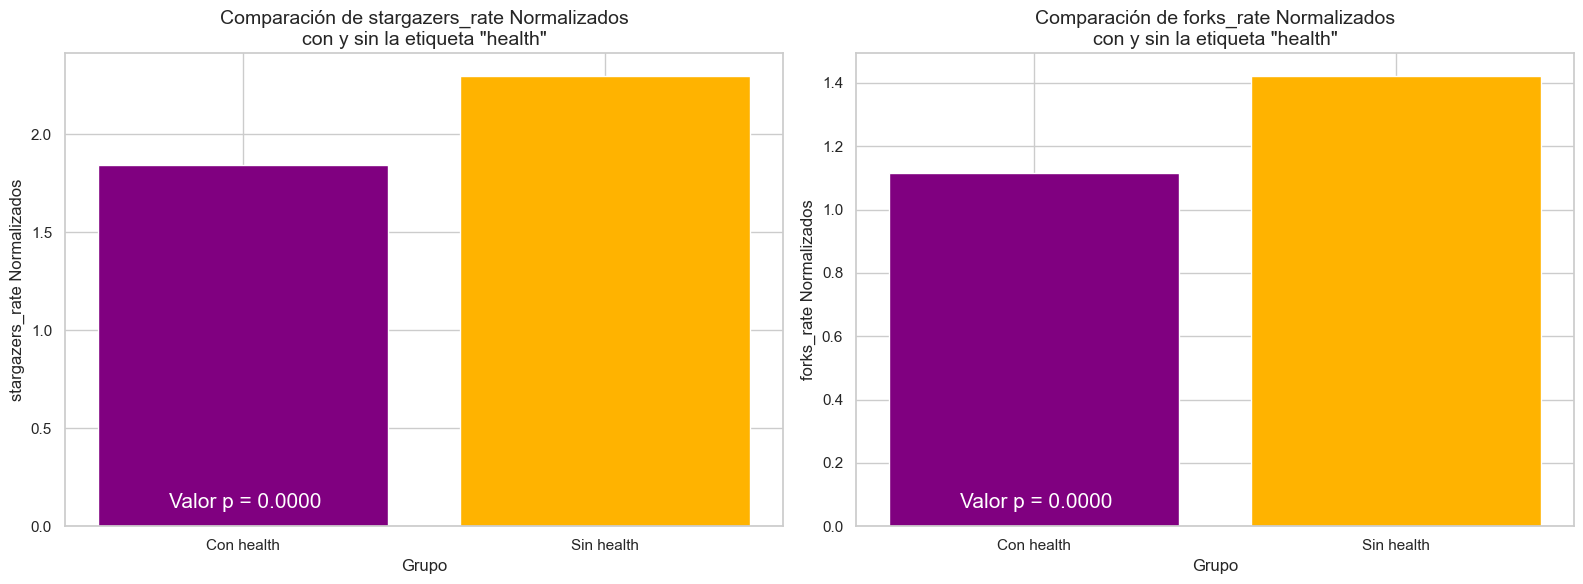

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0000
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [68]:
analyze_topic_success(df_filtered, "health_topics", "health", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'BI': 58
Número de repositorios sin la etiqueta 'BI': 4750
Número de repositorios con la etiqueta 'BI' (después de sobreamostrado): 4750

Para stargazers_rate:
Total 'con BI': 12550.526711877708
Total 'sin BI': 10876.440807200172
Valor normalizado 'con BI': 2.6422161498689913
Valor normalizado 'sin BI': 2.2897770120421415

Para forks_rate:
Total 'con BI': 7676.418806199433
Total 'sin BI': 6729.888629991321
Valor normalizado 'con BI': 1.6160881697261964
Valor normalizado 'sin BI': 1.4168186589455414


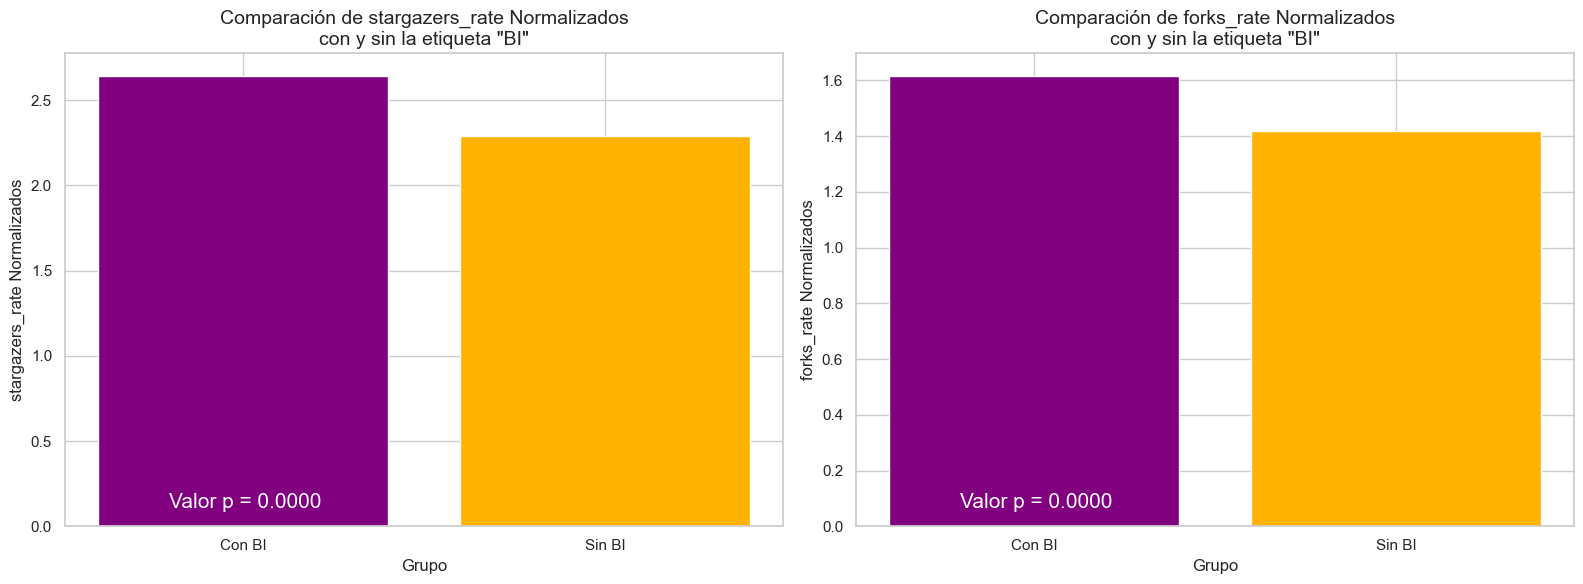

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0000
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [69]:
analyze_topic_success(df_filtered, "BI_topics", "BI", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'computer-vision': 151
Número de repositorios sin la etiqueta 'computer-vision': 4657
Número de repositorios con la etiqueta 'computer-vision' (después de sobreamostrado): 4657

Para stargazers_rate:
Total 'con computer-vision': 13471.238550989088
Total 'sin computer-vision': 10591.360598218447
Valor normalizado 'con computer-vision': 2.8926859675733496
Valor normalizado 'sin computer-vision': 2.2742882968044764

Para forks_rate:
Total 'con computer-vision': 8447.57993017493
Total 'sin computer-vision': 6546.641798691508
Valor normalizado 'con computer-vision': 1.813953173754548
Valor normalizado 'sin computer-vision': 1.4057637532083975


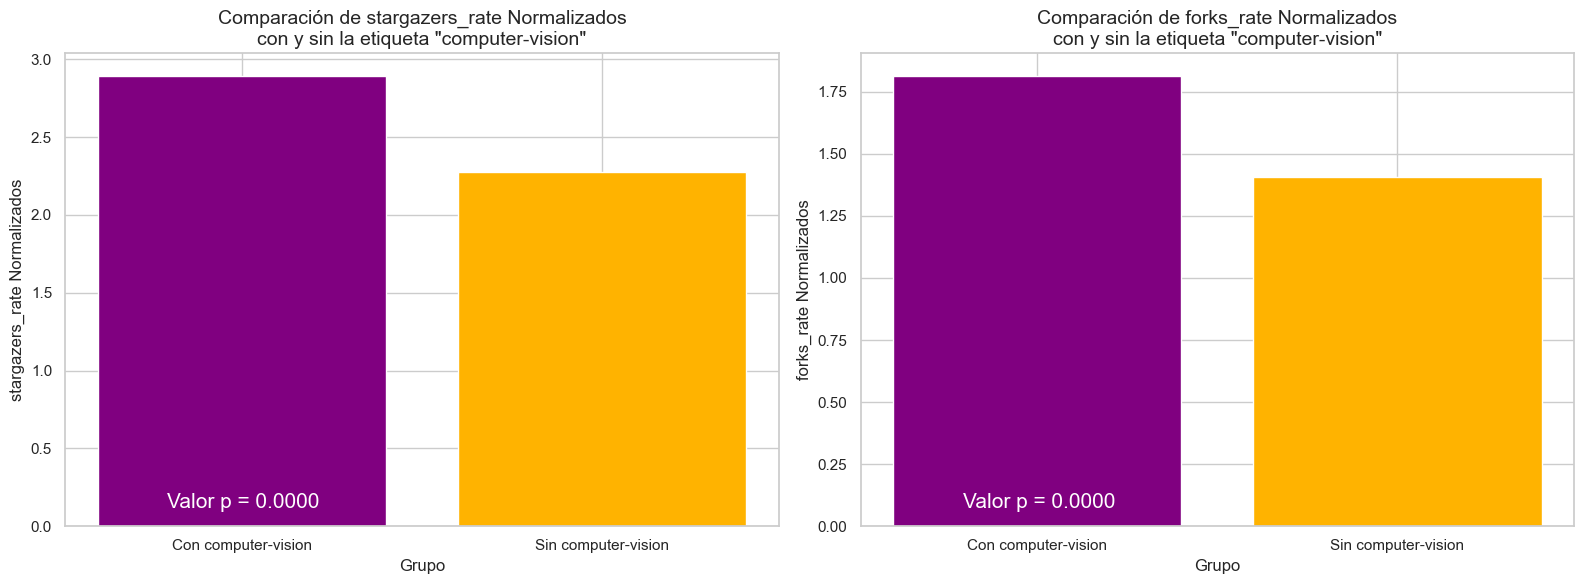

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0000
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [70]:
analyze_topic_success(df_filtered, "computer-vision_topics", "computer-vision", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

Número de repositorios con la etiqueta 'deep-learning': 775
Número de repositorios sin la etiqueta 'deep-learning': 4033
Número de repositorios con la etiqueta 'deep-learning' (después de sobreamostrado): 4033

Para stargazers_rate:
Total 'con deep-learning': 11895.03279359054
Total 'sin deep-learning': 8768.215840956085
Valor normalizado 'con deep-learning': 2.9494254385297647
Valor normalizado 'sin deep-learning': 2.1741174909387766

Para forks_rate:
Total 'con deep-learning': 7541.446826337073
Total 'sin deep-learning': 5383.687857491634
Valor normalizado 'con deep-learning': 1.8699347449385253
Valor normalizado 'sin deep-learning': 1.33490896540829


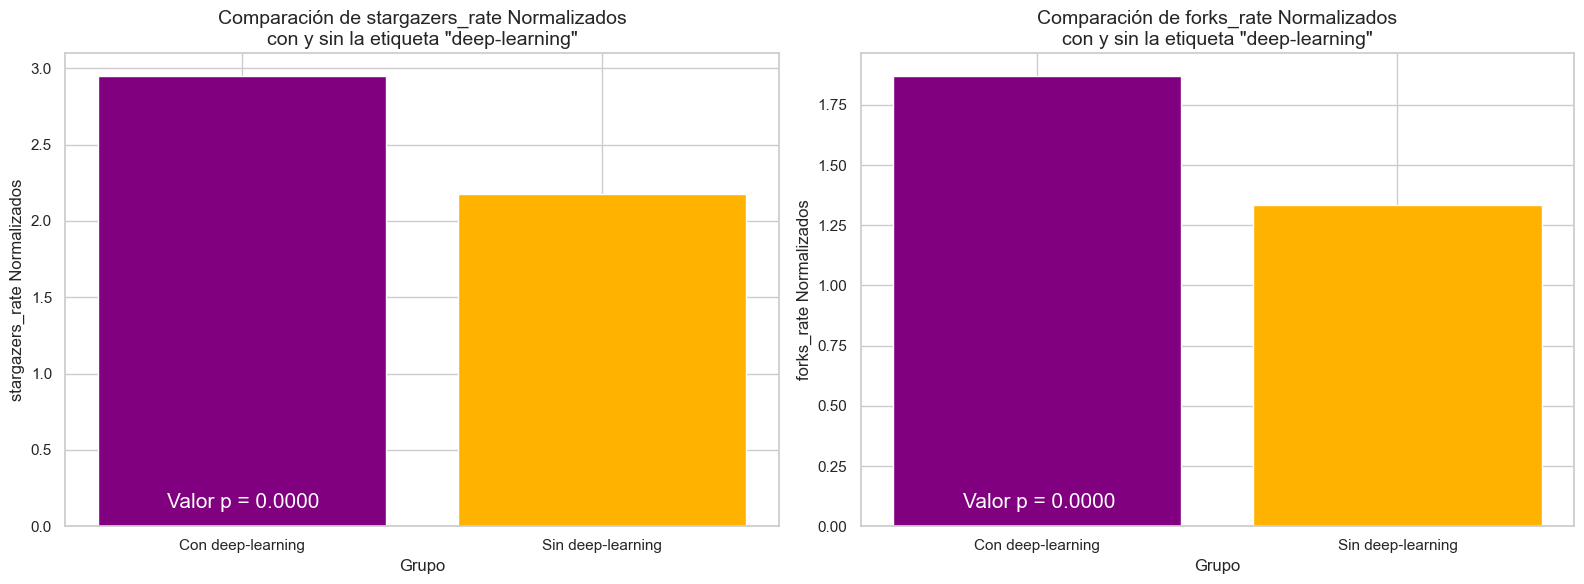

Valor p de la prueba de Mann-Whitney para stargazers_rate: 0.0000
Rechazamos la hipótesis nula para stargazers_rate: Existe una diferencia significativa entre los dos grupos.

Valor p de la prueba de Mann-Whitney para forks_rate: 0.0000
Rechazamos la hipótesis nula para forks_rate: Existe una diferencia significativa entre los dos grupos.



In [71]:
analyze_topic_success(df_filtered, "deep-learning_topics", "deep-learning", ["stargazers_rate", "forks_rate"], log_normalization=True, oversample=True)

In [74]:
# Mecanismos para salvar as imagens, sobrescrevendo-as quando gere a mesma imagem com o mesmo título (apenas uma ideia)

# Organizar todo o notebook

# Fazer a aparesentação